In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('../pipeline')
%load_ext autoreload
%autoreload 2

In [75]:
df_train = pd.read_csv('data/onetwotrip_challenge_train.csv')
df_test = pd.read_csv('data/onetwotrip_challenge_test.csv')

In [76]:
data = pd.concat([df_train, df_test], axis=0, sort=False )

In [77]:
data = data.fillna(-1)

In [78]:
data['paid_tickets'] = data.field15 - data.field9

In [79]:
count = dict(data['userid'].value_counts())
data['count'] = data['userid'].apply(lambda x: count[x])

In [80]:
data['count'].value_counts().sort_index()

1      259504
2      138314
3       70359
4       41968
5       26210
        ...  
198       198
222       222
310       310
363       363
756       756
Name: count, Length: 114, dtype: int64

In [81]:
data['oneWay'] = 0
idx= data[data.field15 % 2 == 1 ].index
data.loc[idx,'oneWay'] = 1

In [82]:
data_one_way_only.field7.value_counts()

NameError: name 'data_one_way_only' is not defined

In [ ]:
for f in [f'field{i}' for i in range(0,30)]:
    print(data_one_way_only[f].value_counts())

In [ ]:
count

In [67]:
top_users = data[data['count']>100]['userid'].value_counts()

In [11]:
data.field7.value_counts().sort_index()

1    479408
2    171659
Name: field7, dtype: int64

In [14]:
bins1=pd.qcut(data[data[target] == 1]['field1'],23, retbins=True, duplicates='drop')

c:\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

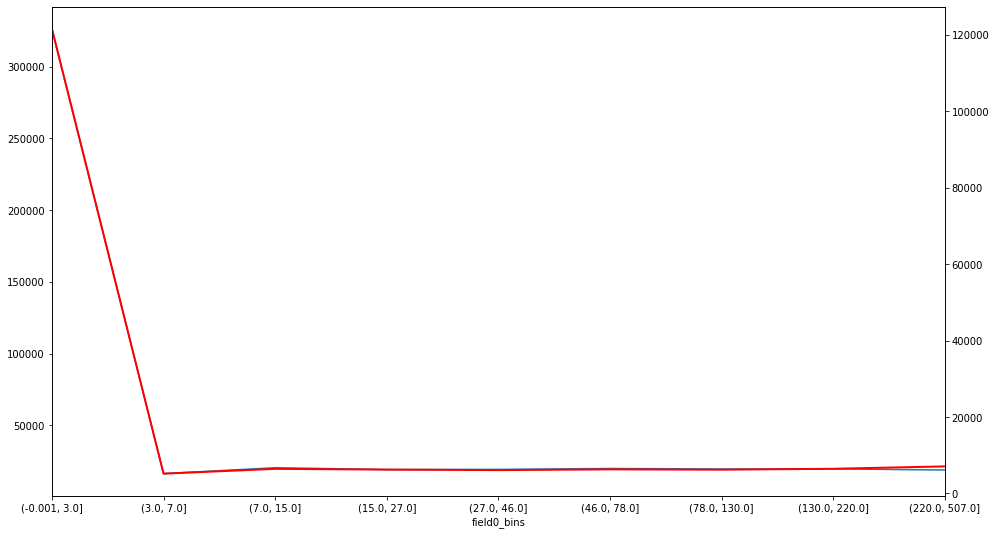

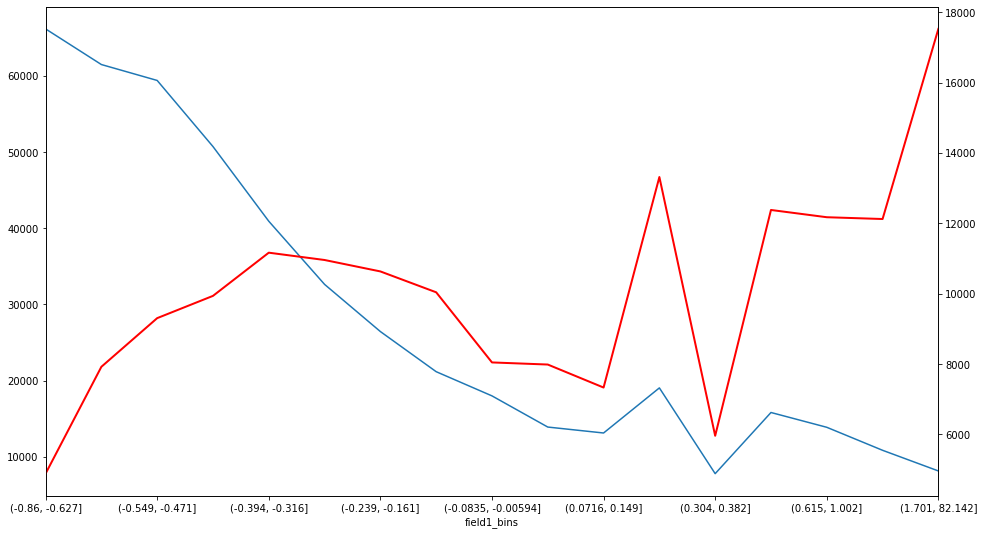

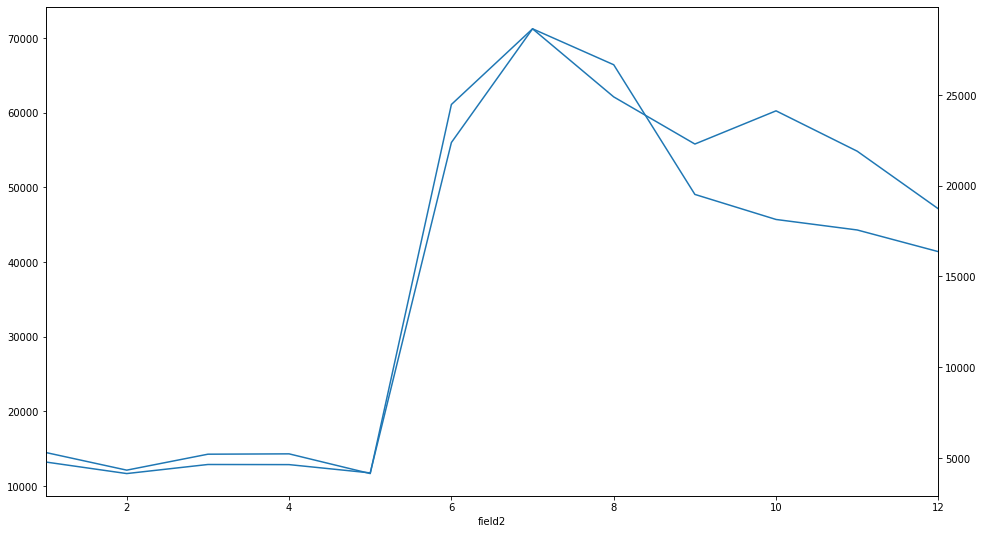

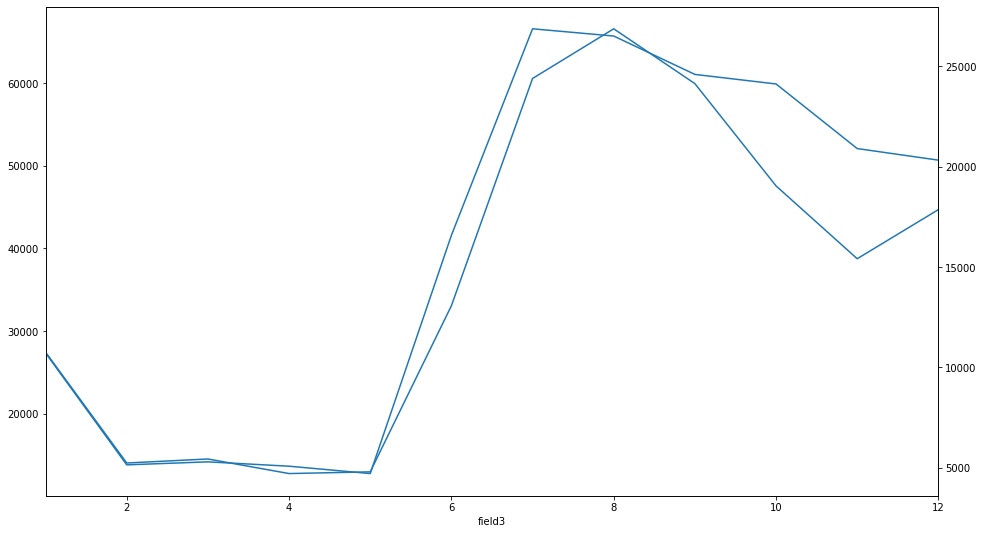

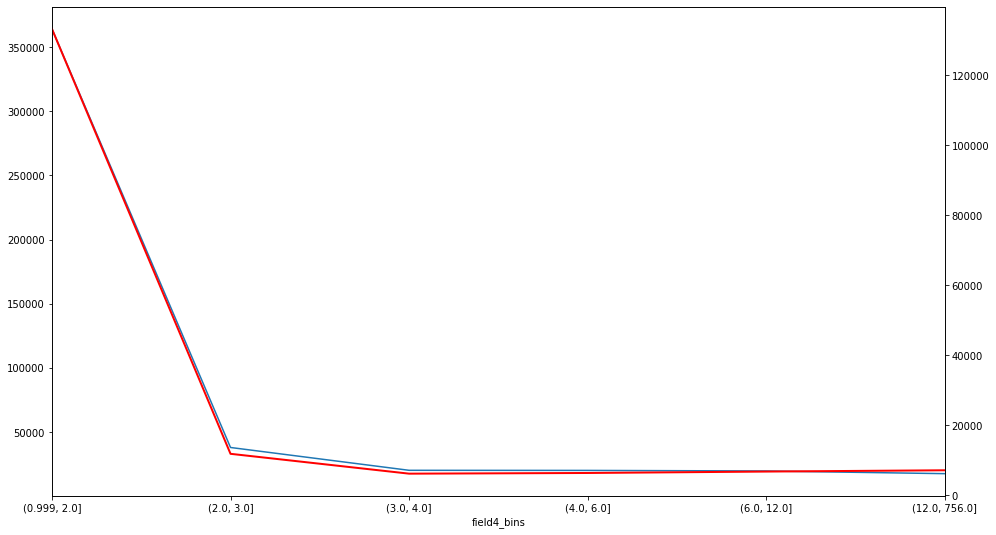

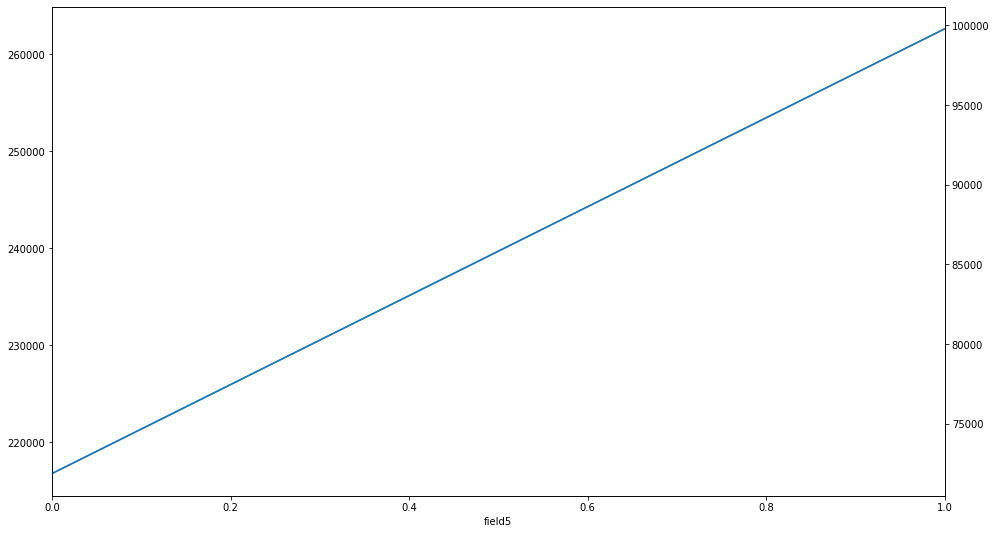

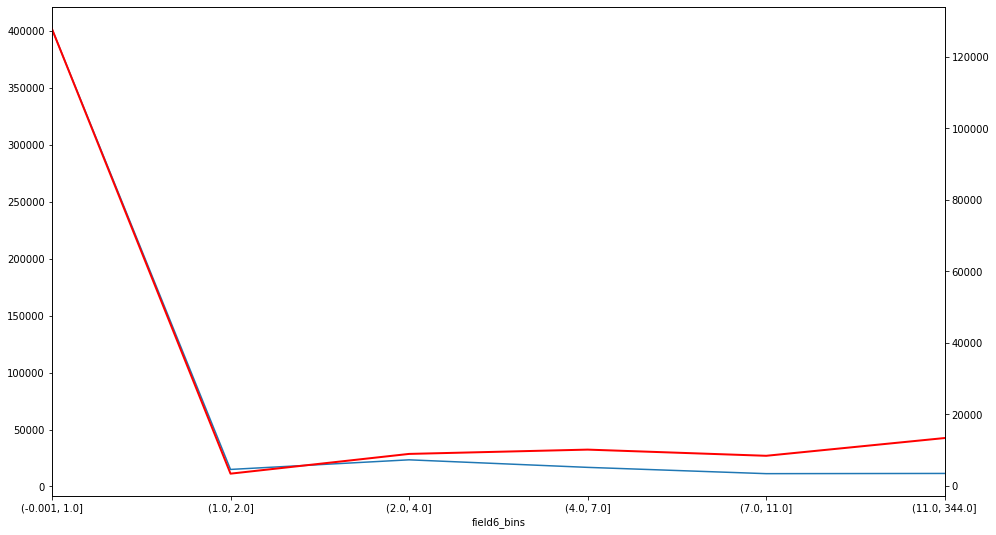

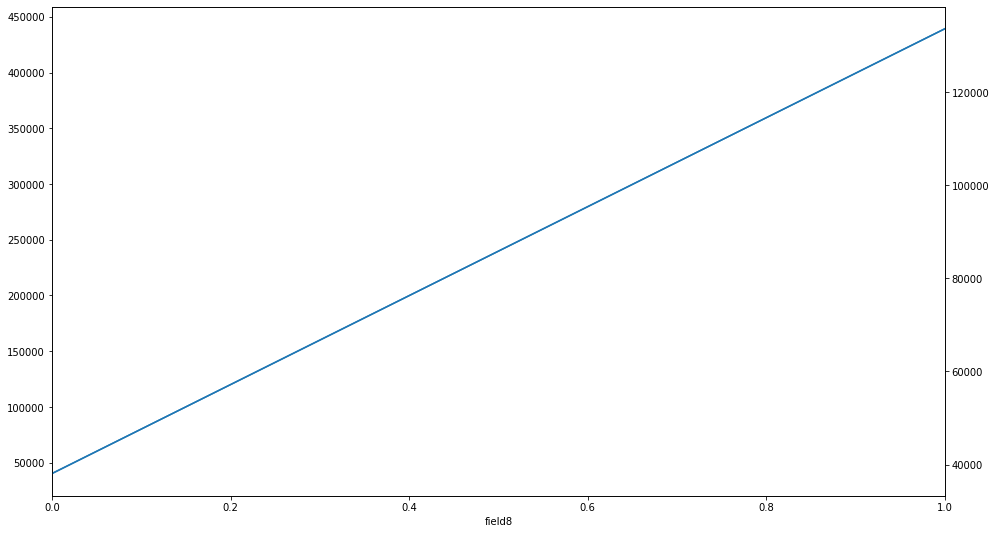

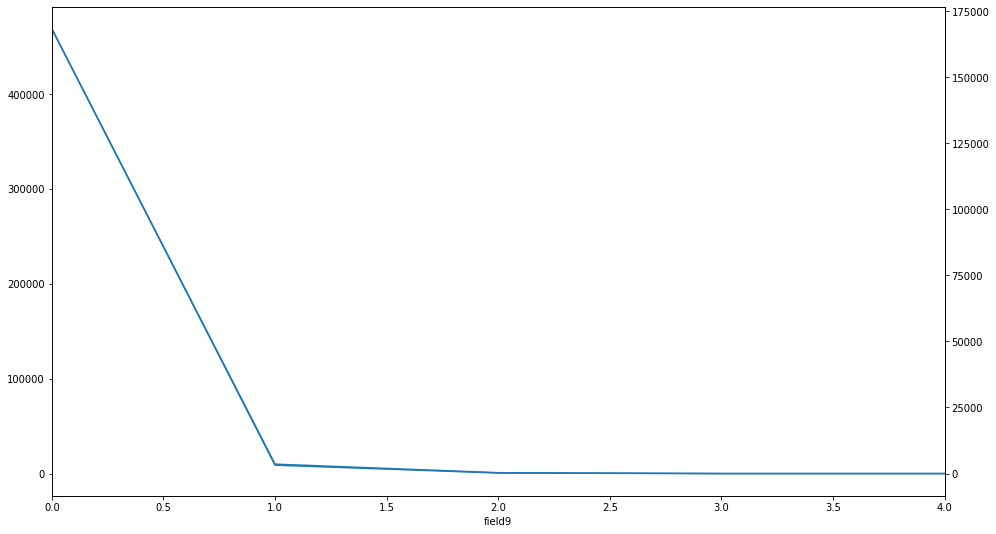

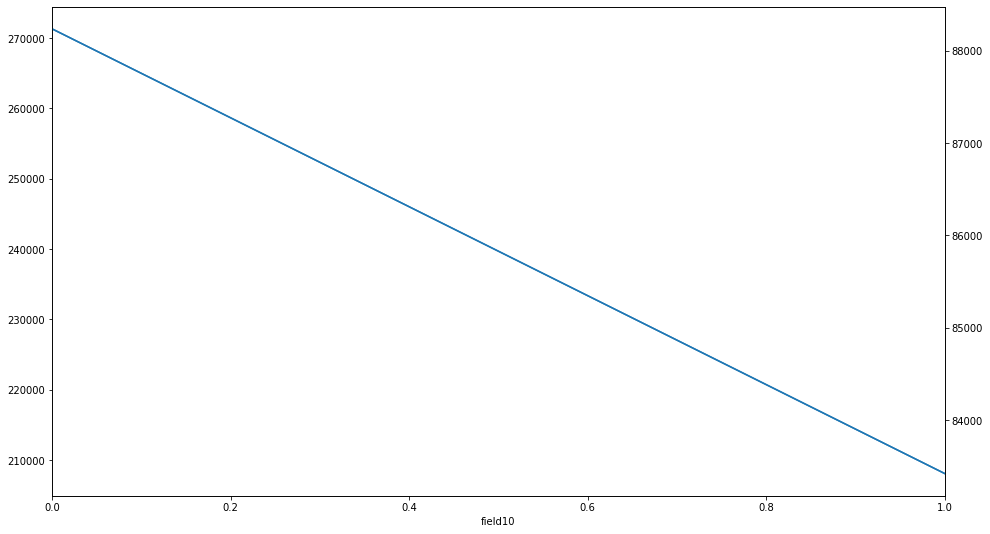

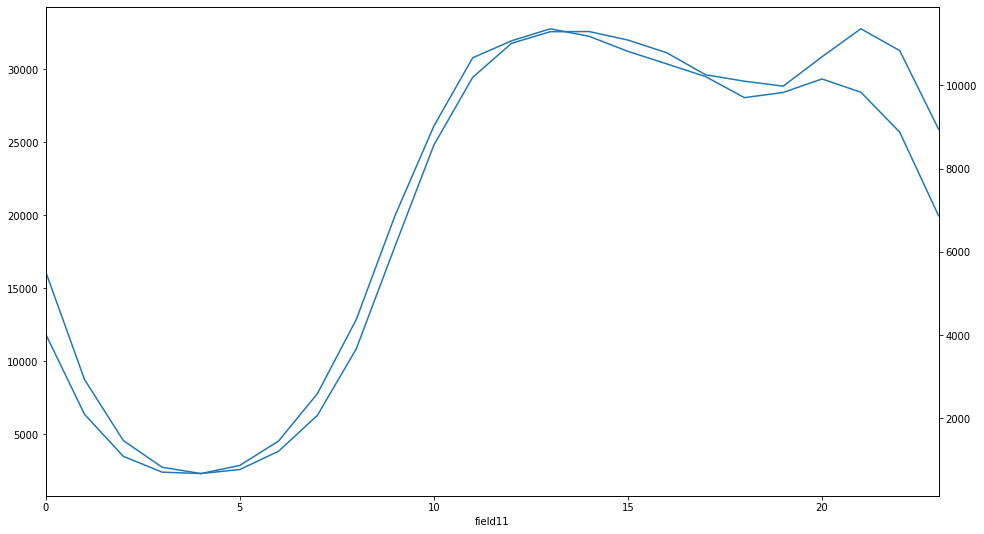

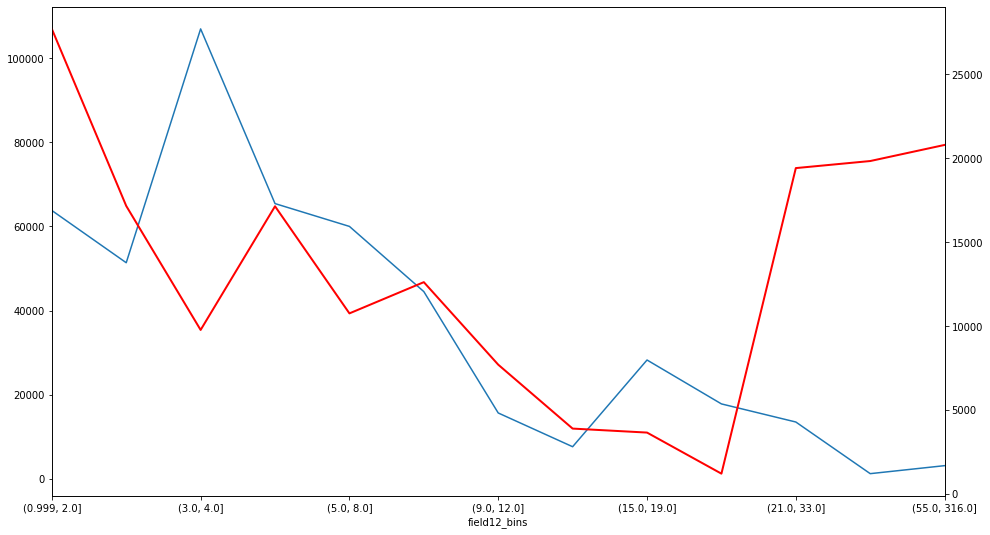

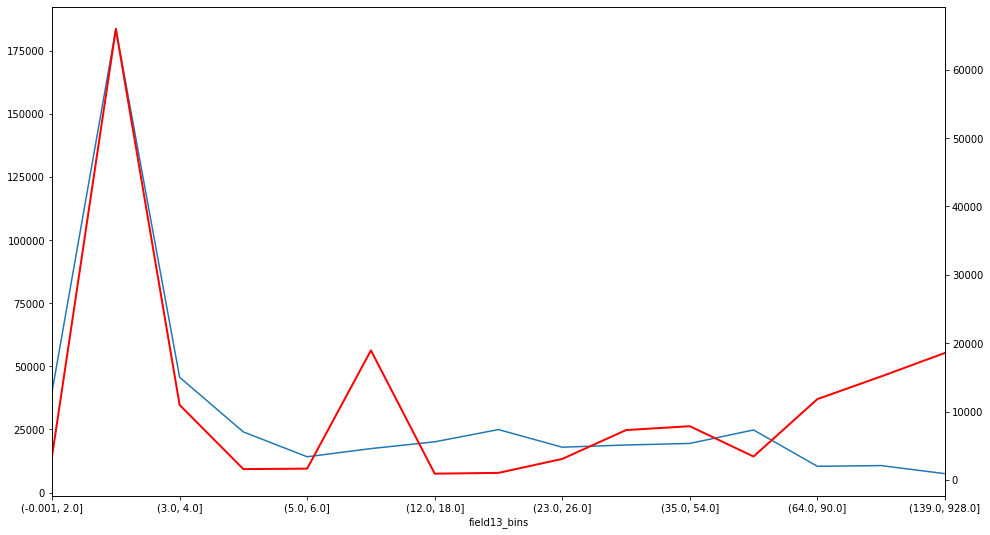

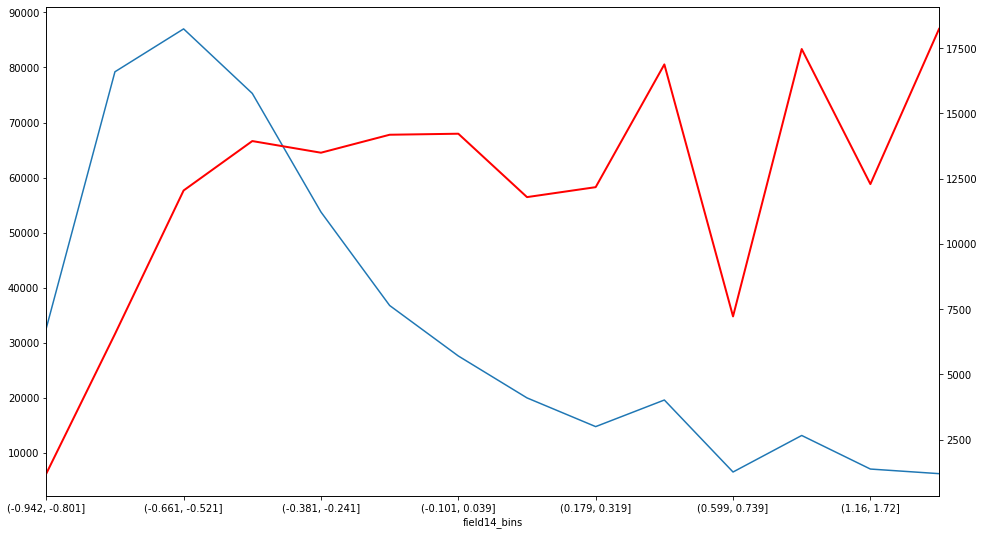

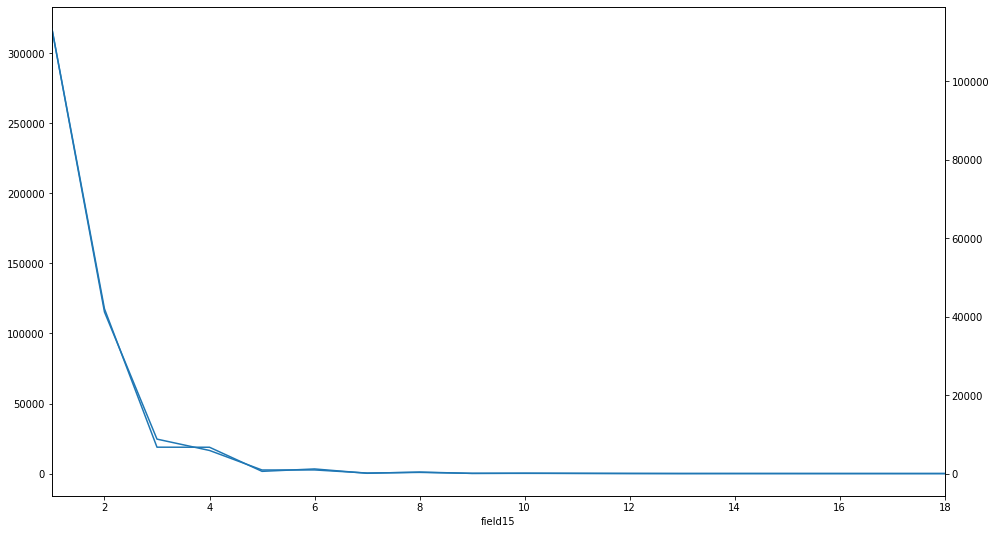

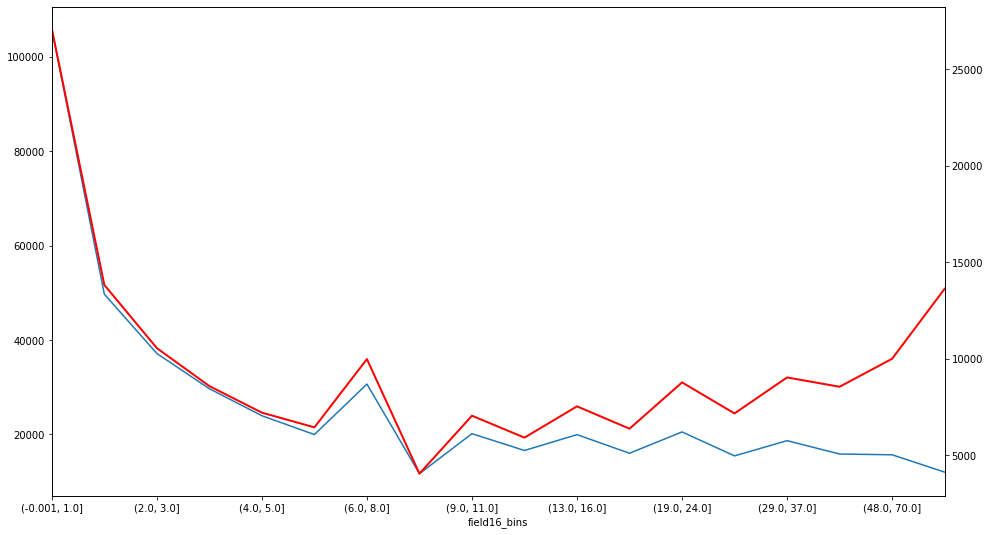

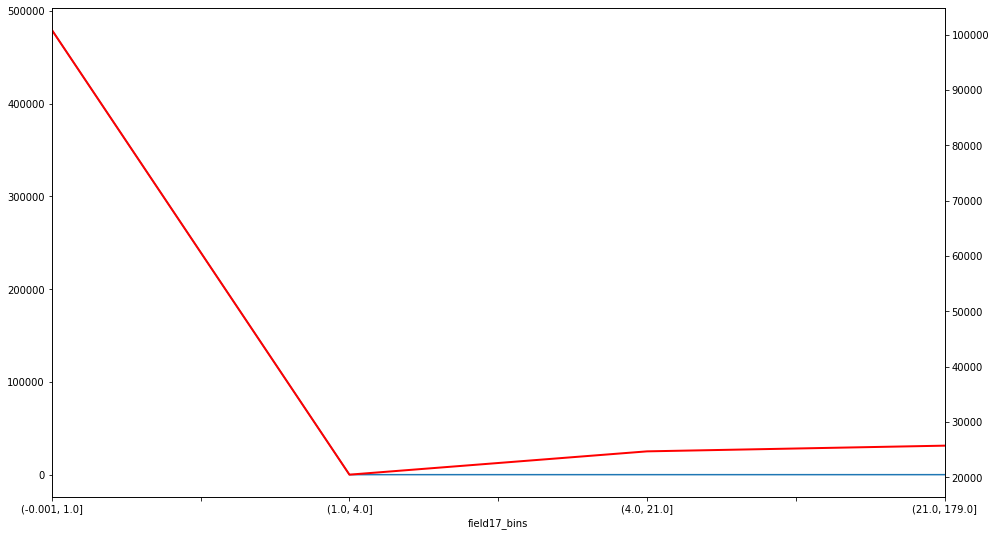

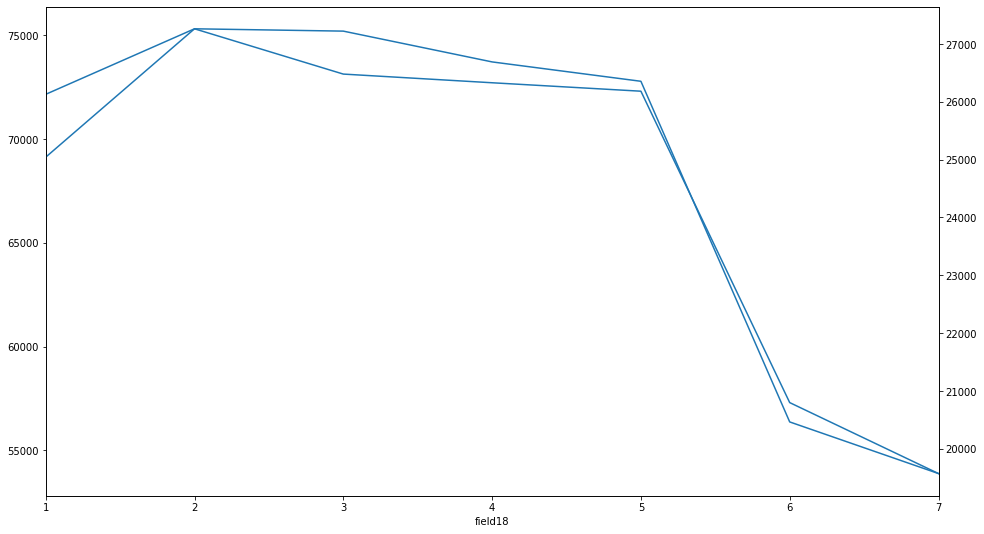

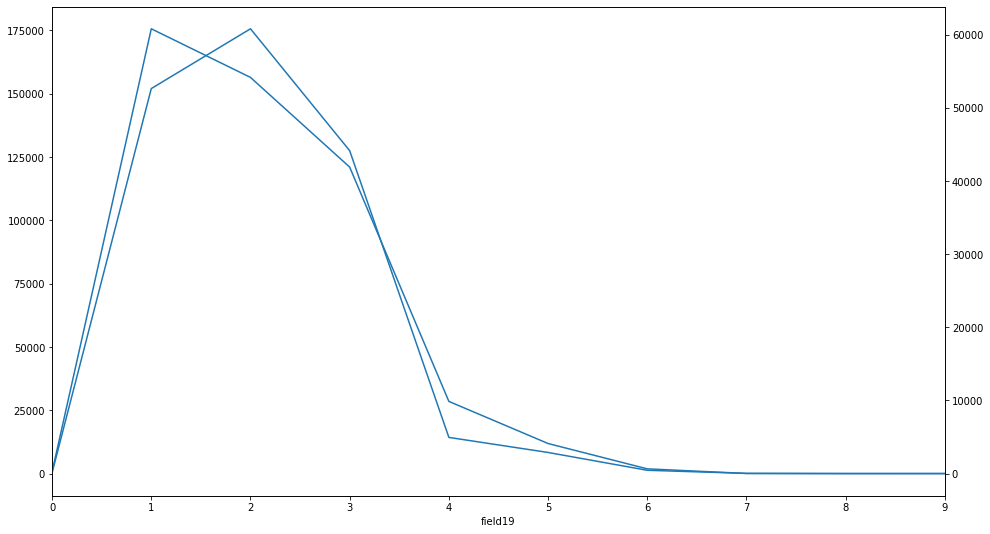

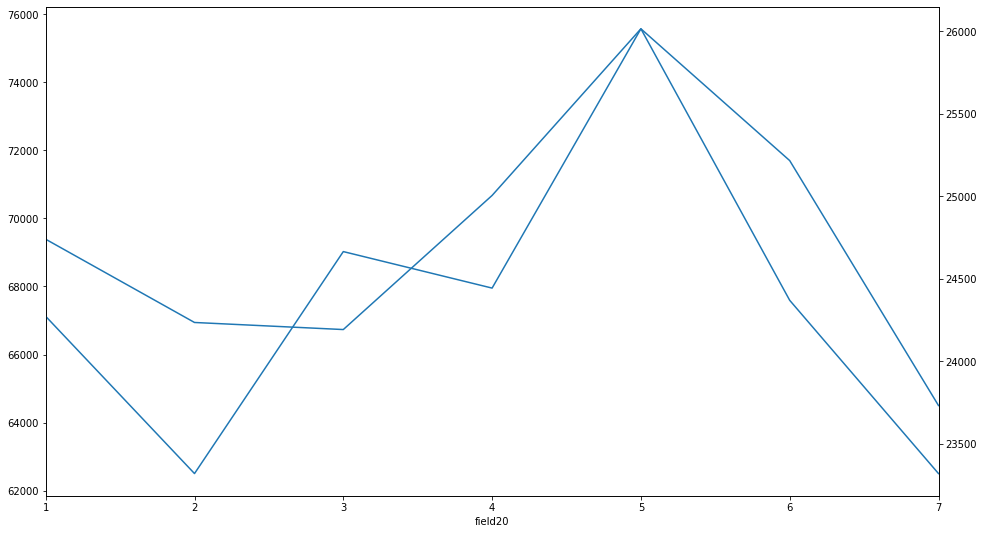

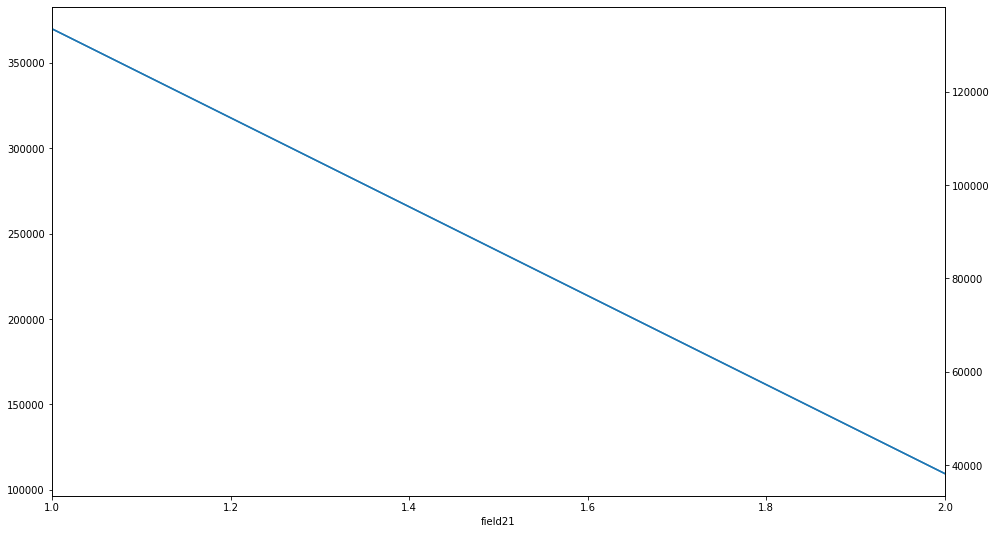

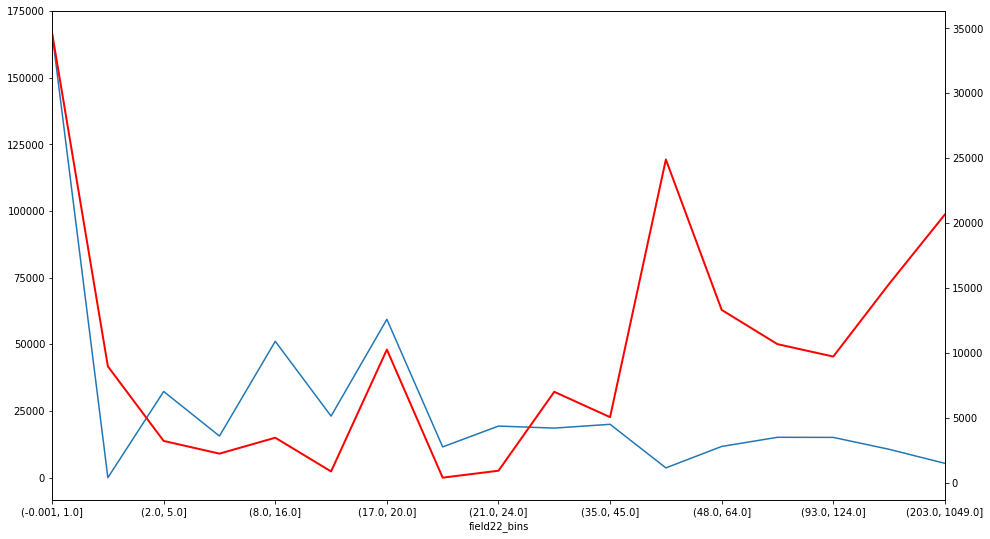

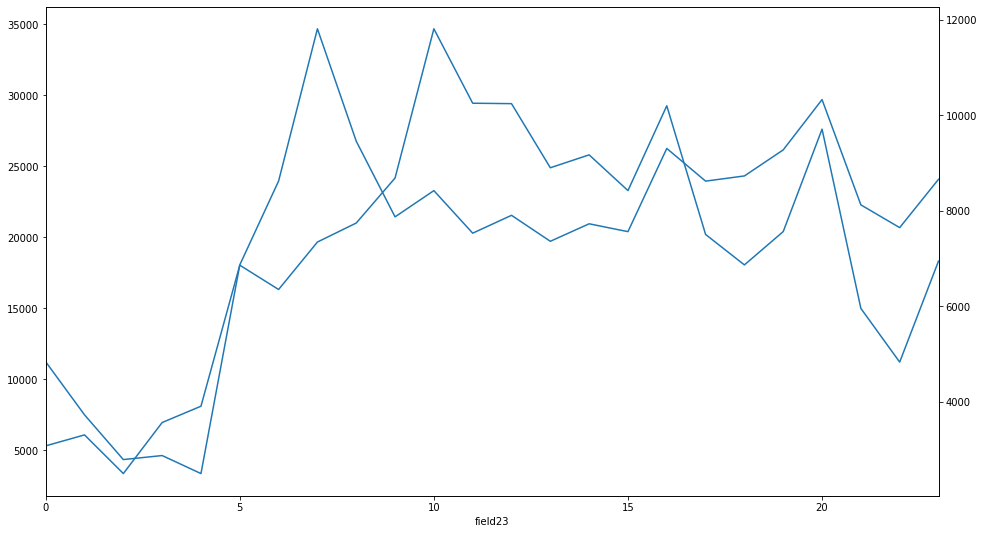

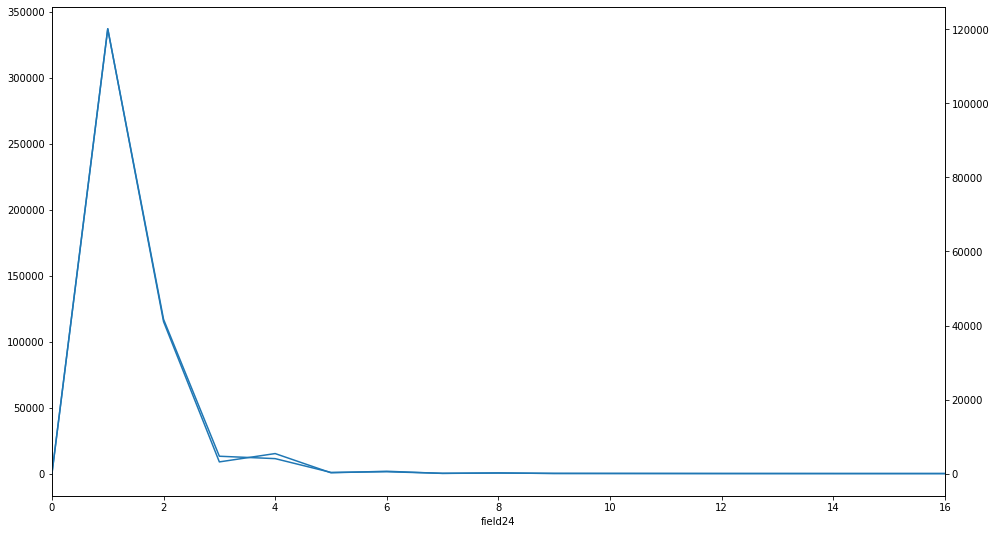

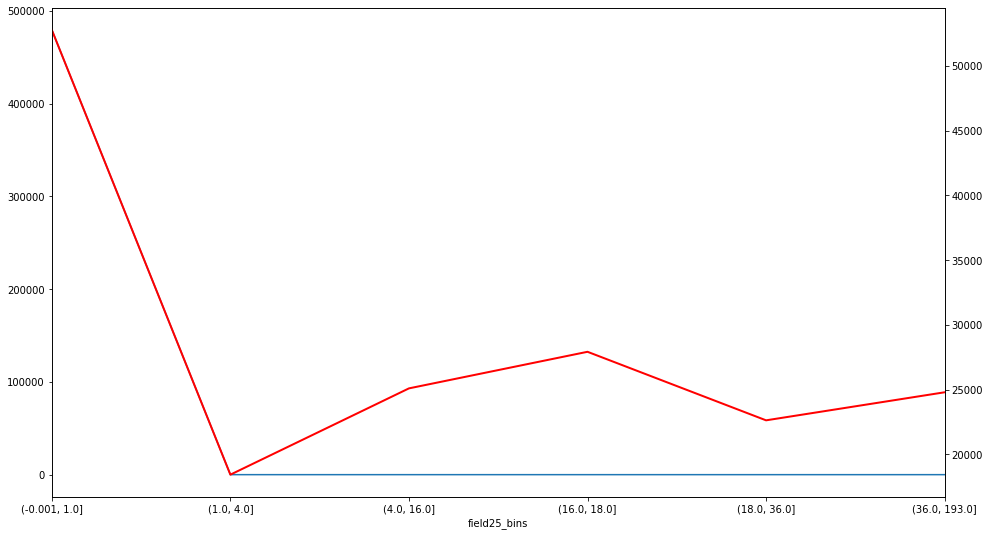

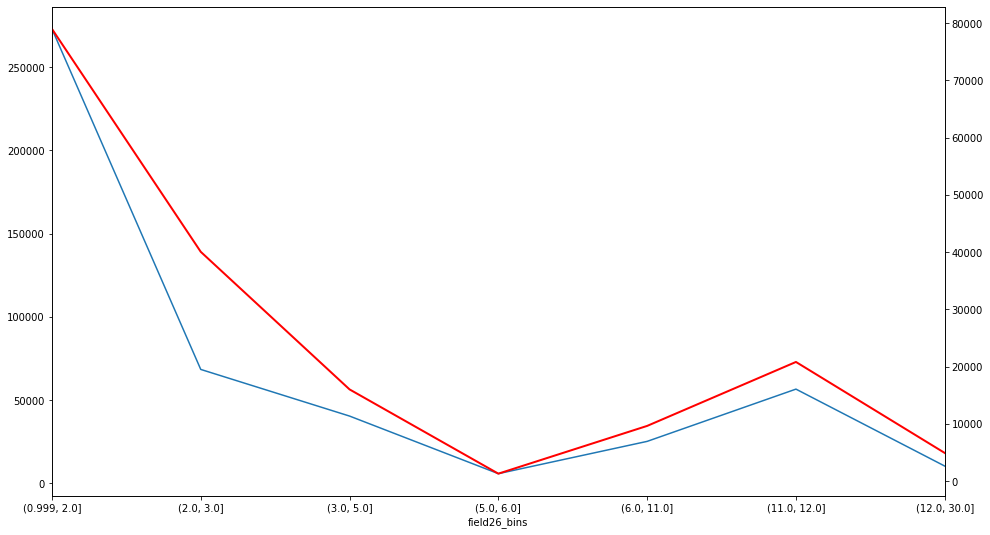

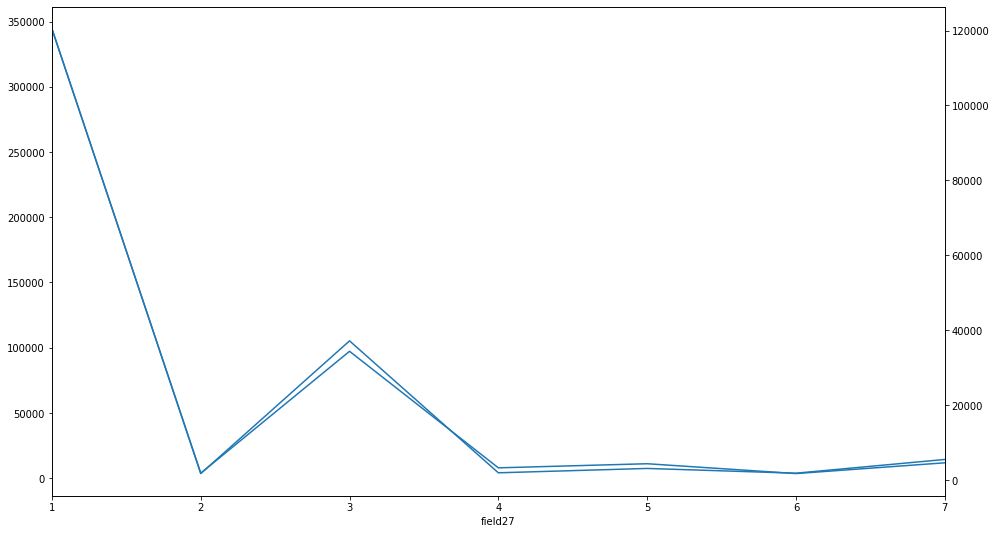

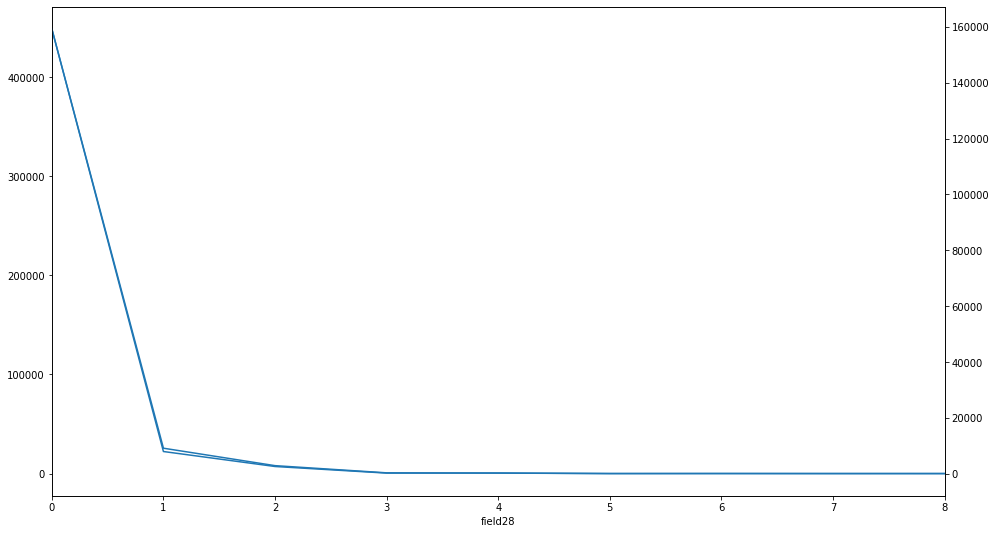

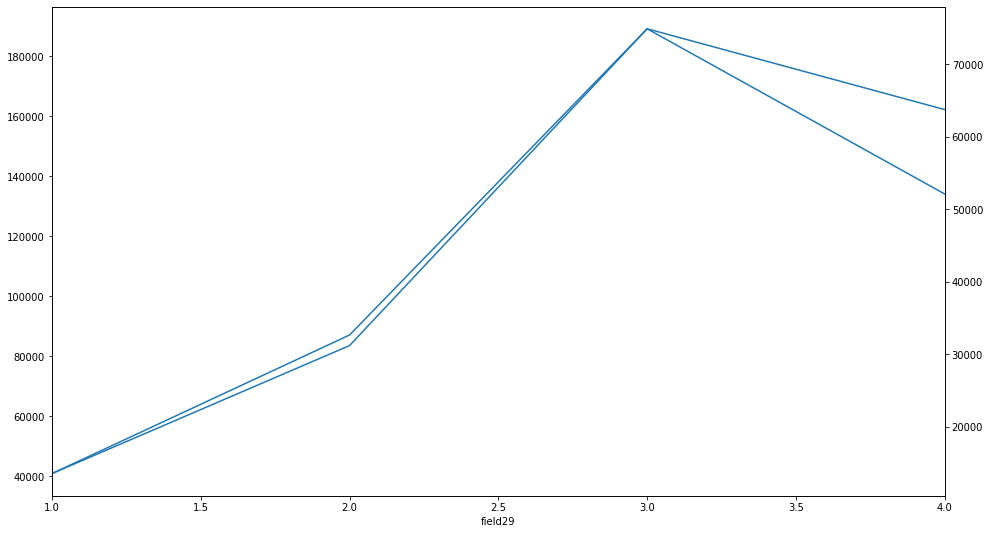

In [36]:
target = 'field7'

for f in [f'field{i}' for i in range(0,30)]:
    if f == target:
        continue
    plt.figure(figsize=(16,9))
    qdata = data[[f,target]]
    if len(qdata[f].value_counts()) > 25:
        bins = pd.qcut(data[f],25, retbins=True, duplicates='drop') 
        qdata[f'{f}_bins'] = bins[0]
        ax=qdata[qdata[target]==1].groupby(f'{f}_bins')[f].agg('count').plot()
        ax.twinx()
        qdata[qdata[target]==2].groupby(f'{f}_bins')[f].agg('count').plot(color='red', linewidth=2)
    else:
        ax=qdata[qdata[target]==1].groupby(f)[f].agg('count').plot()
        ax.twinx()
        ax=qdata[qdata[target]==2].groupby(f)[f].agg('count').plot()
#     ax2=ax.twinx()
#     qdata[qdata.field7==2].groupby('bins')[target].agg('mean').plot(color='red', linewidth=2)
#     ax=data_one_way_only.groupby(f)[target].agg('mean').plot()

#     ax2 = data.groupby(f)[target].agg('count').plot(color='red', linewidth=2)

In [99]:
data['price'] = (data['field1']  / 0.077571 + 12.076591).astype(np.int32)

In [100]:
data['price'].value_counts().sort_index()

1           5
2        1006
3       16511
4       53536
5       69415
        ...  
588         1
590         1
661         1
1034        1
1071        1
Name: price, Length: 317, dtype: int64

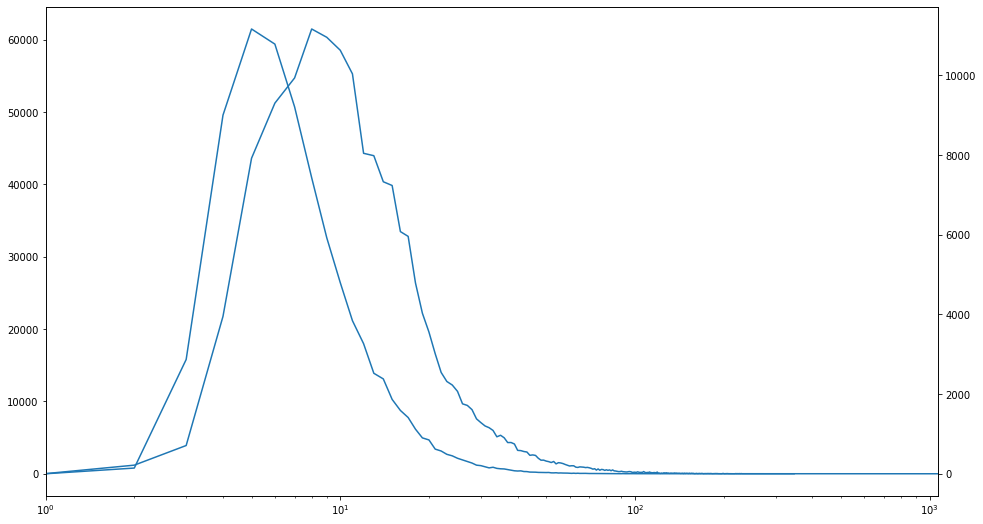

In [54]:
plt.figure(figsize=(16,9))
ax = data[data.field7==1]['price'].value_counts().sort_index().plot()
ax.twinx()
ax2 = data[data.field7==2]['price'].value_counts().sort_index().plot()
ax.set_xscale('log')

In [68]:
top_users

88a595f6f7754f656b33cca2c6addcb9c659c30bad00656779378af80209912a    756
a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52    363
d4017f49f9e5cebdefabef5714f138ea0fc72410d19ac9997d416dc96dc01f23    310
98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b    222
2350f28919b7b4161f4e22c491cac8d5ae5347c4f52130b922651fbbb4f7381c    198
c2d39c54936961e415d536315954cf31d4a506334f65dfe96705297ca4d11a60    193
a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4    185
739eafb20f821b94d1d22146706a6c4d0375de292cd21ba3b6ba3278dc54fc93    177
6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67    177
350bc1455fa1adeef3346b956f87e23252b751efdbdec5b81d40fc8f4e5c2d2a    167
38188de7f244abad2947d65f588a7ea7818f465d9a63871fdf7fa2444318e7e1    161
4ff6d90fa7505838ff071e9a9e01208f5dfd3f5f237c74ff2e62c85a42522402    157
13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa    149
e139cfdfd8ccc2813af314294b72bcf5b2c0b294a6813b8ff485bbcf03dc0e28

In [88]:
user

'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52'

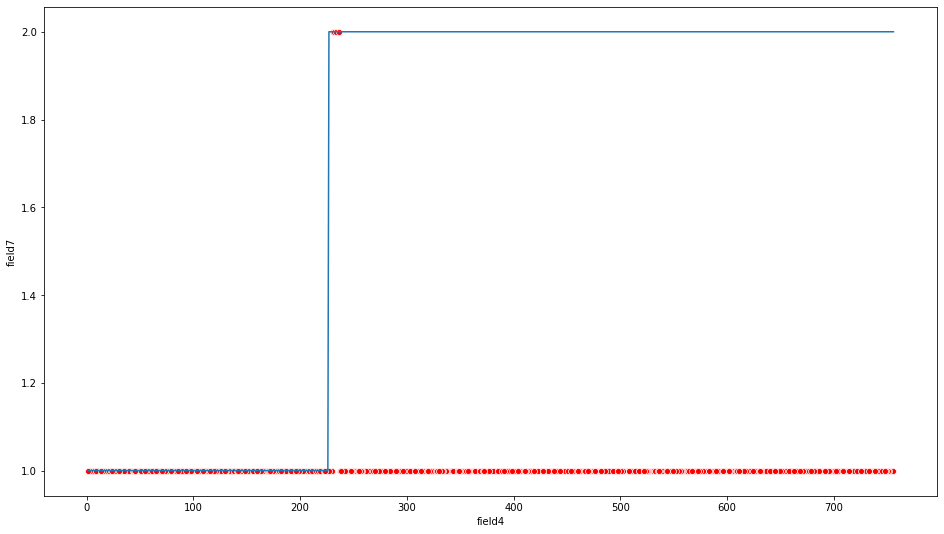

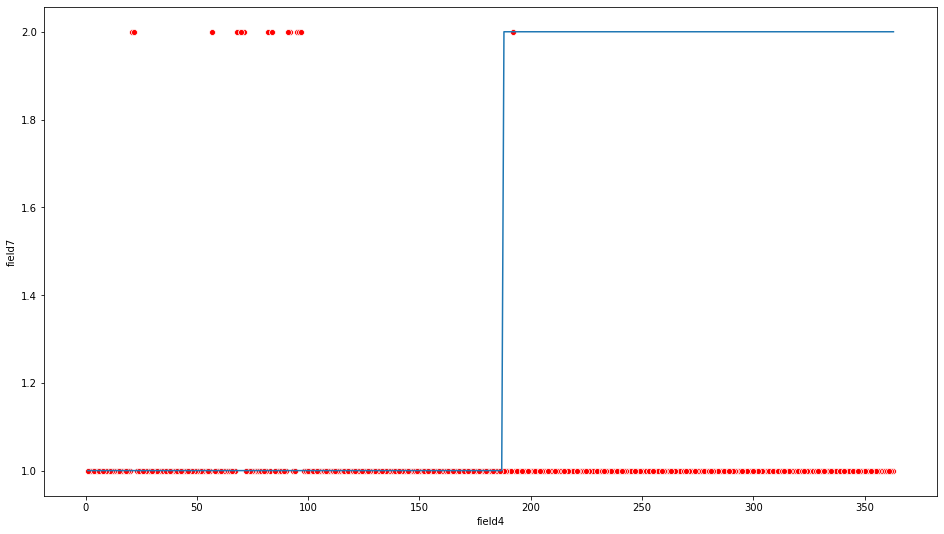

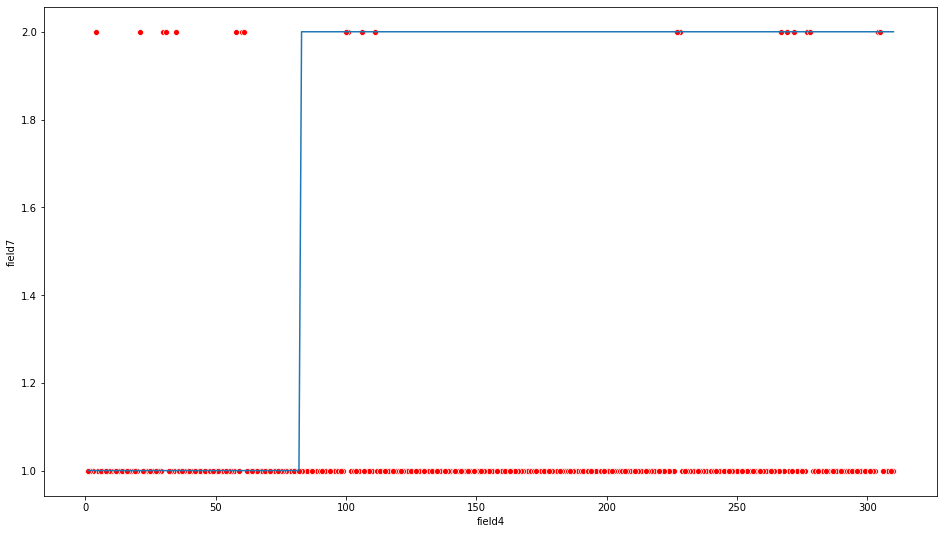

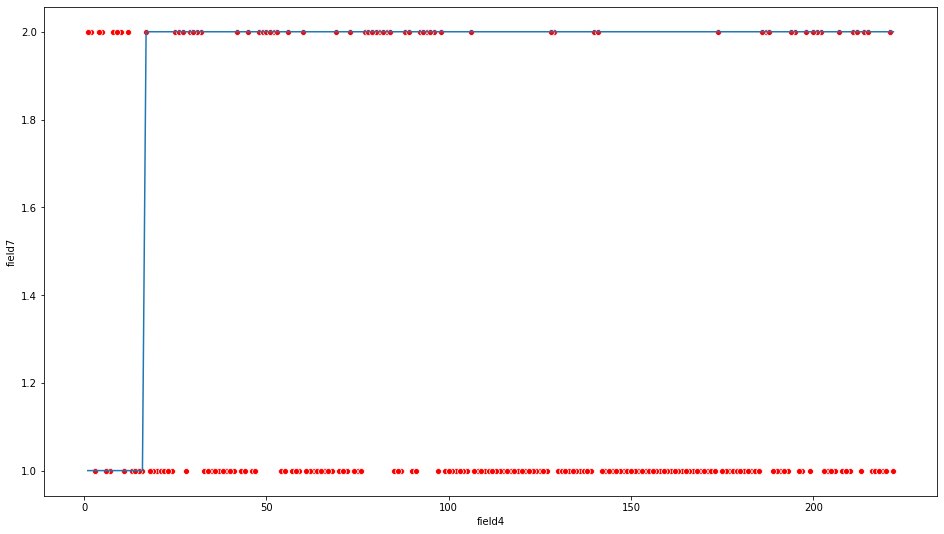

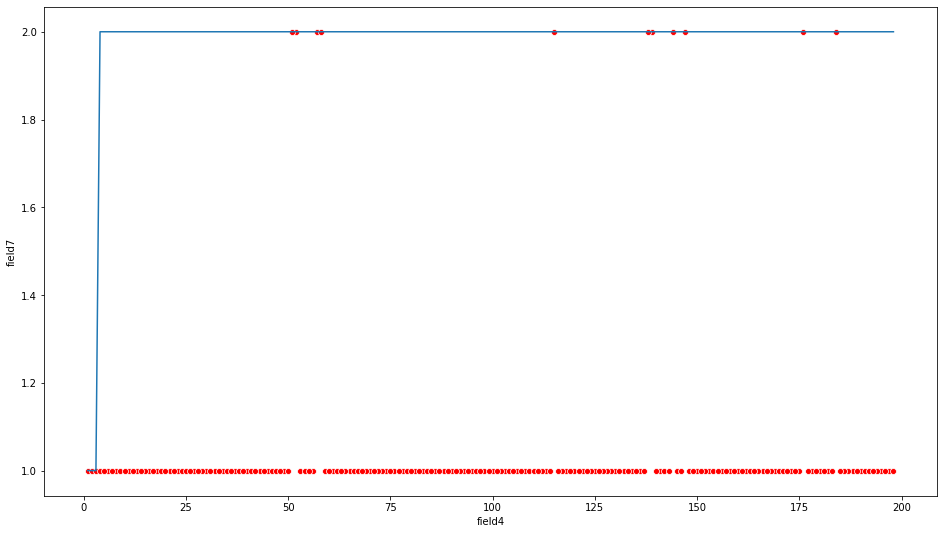

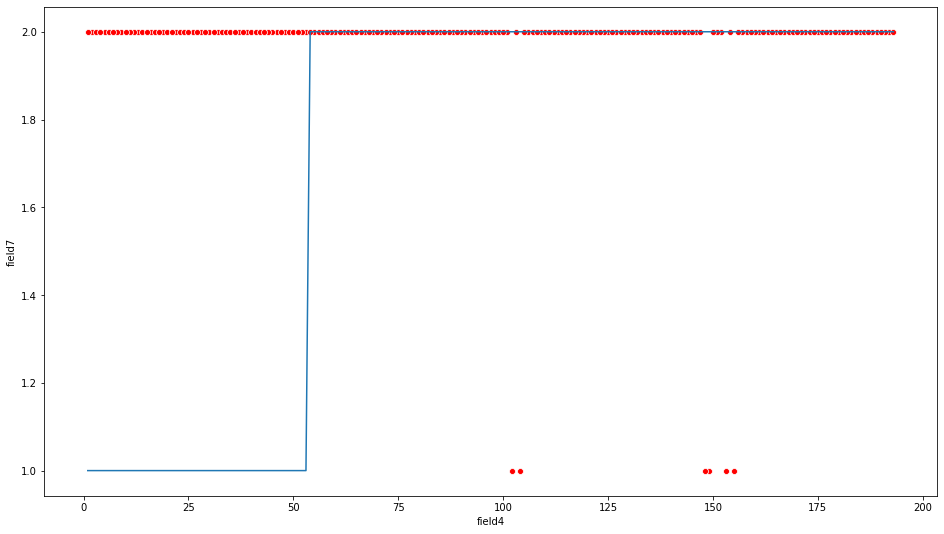

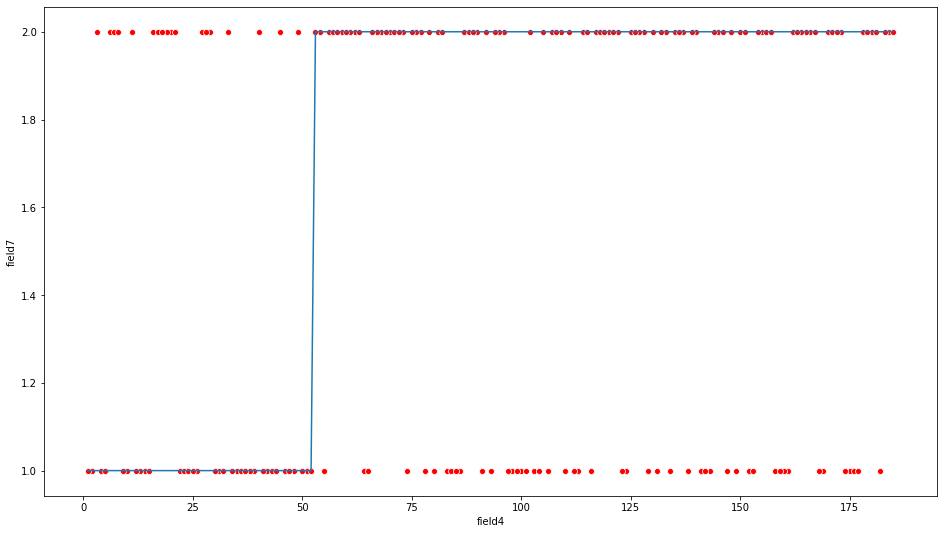

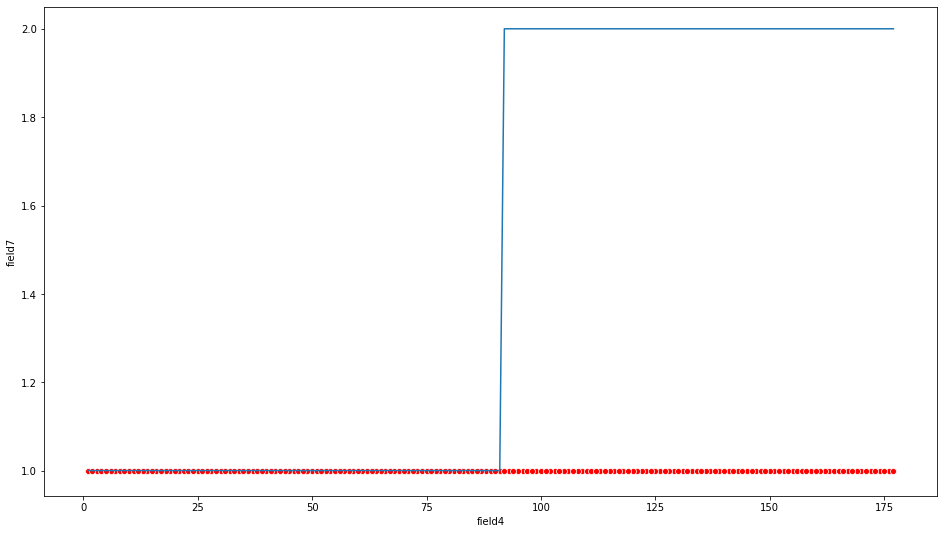

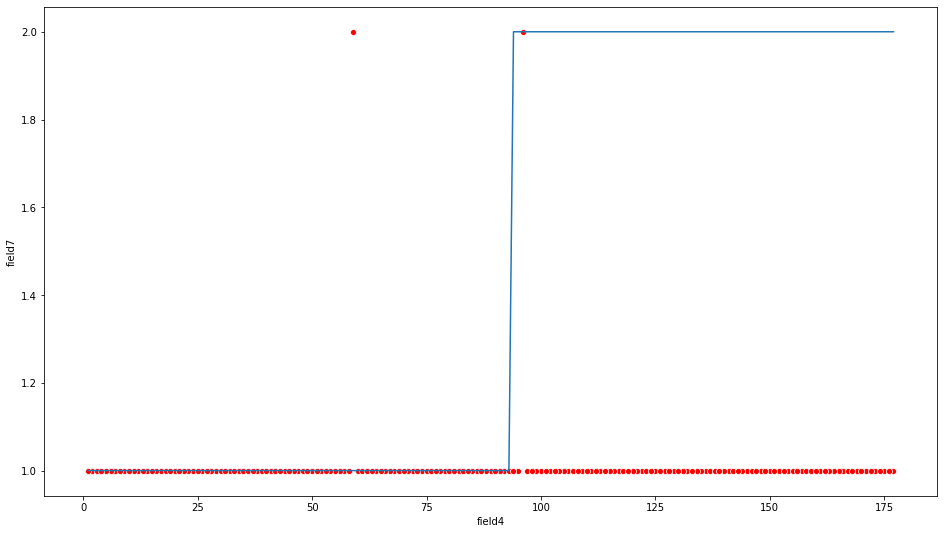

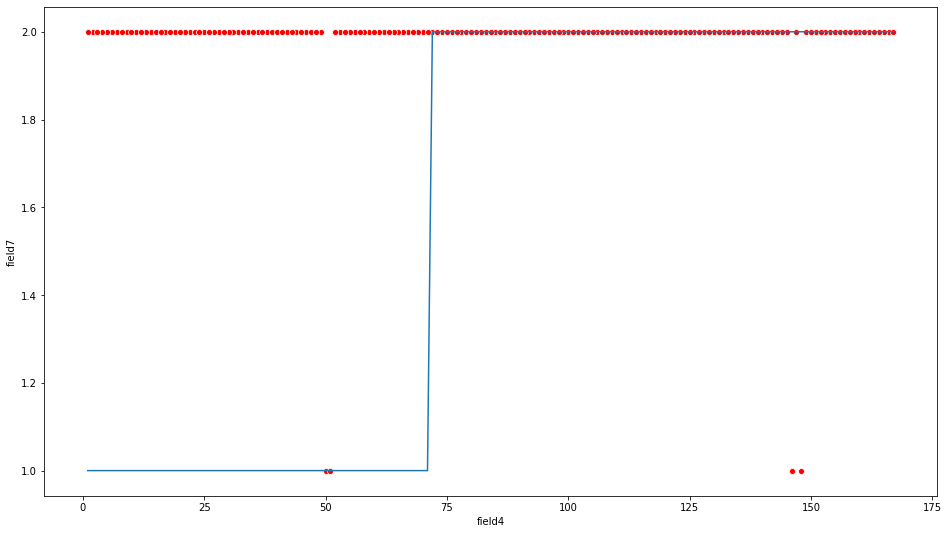

In [96]:
for i in range(10):
    user = top_users.index[i]
    plt.figure(figsize=(16,9))
    sns.lineplot(data = data[data.userid==user], x='field4', y='field21')
    sns.scatterplot(data = data[data.userid==user], x='field4', y='field7',color='red')


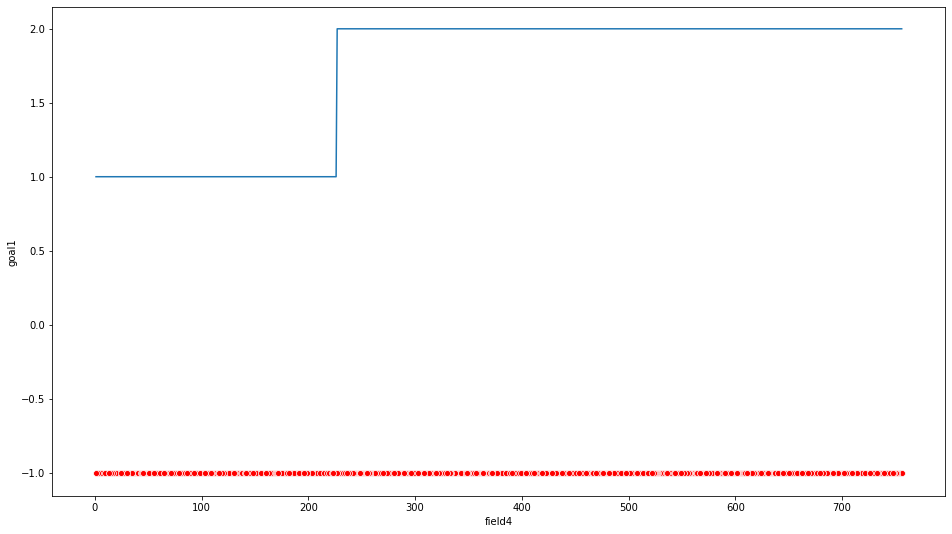

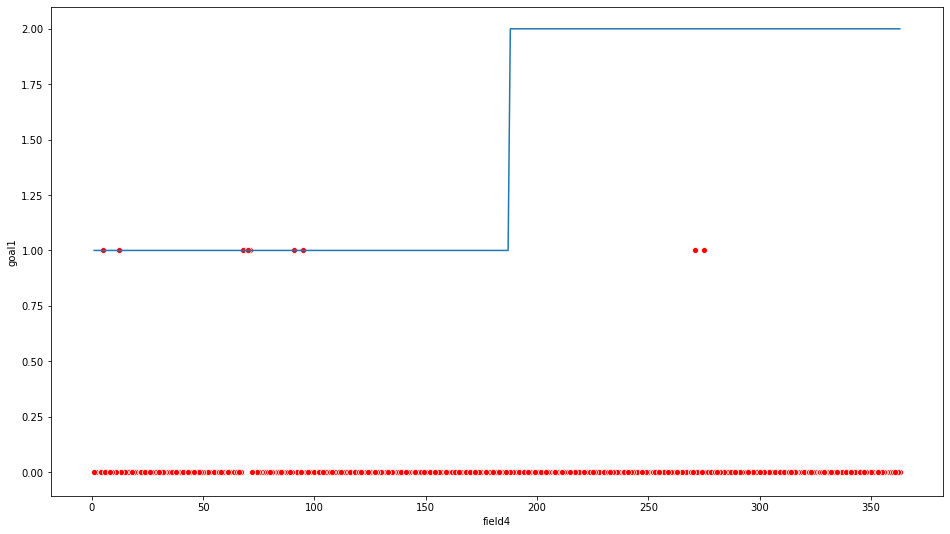

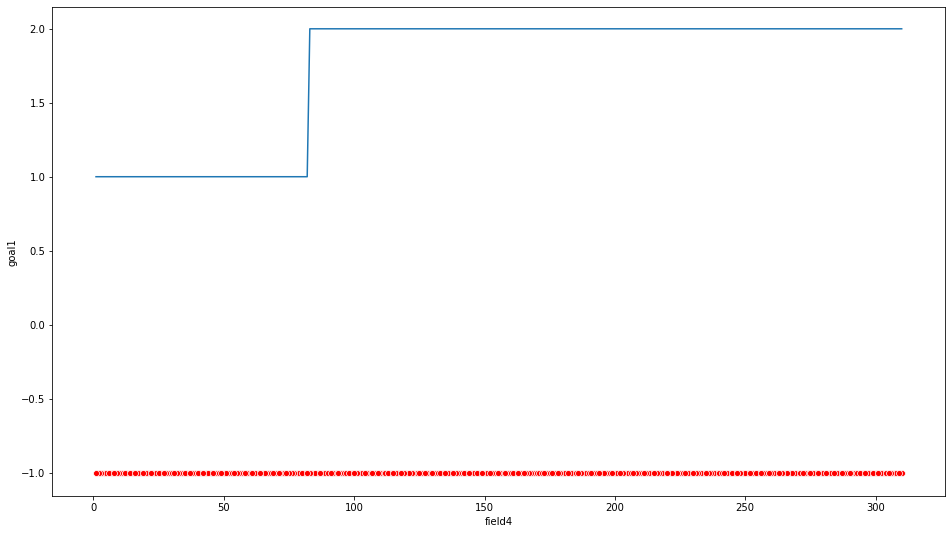

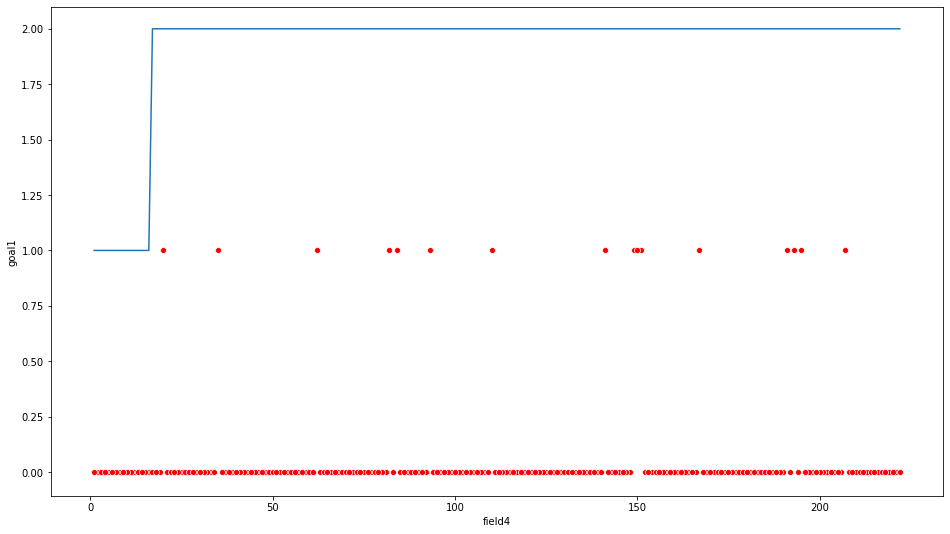

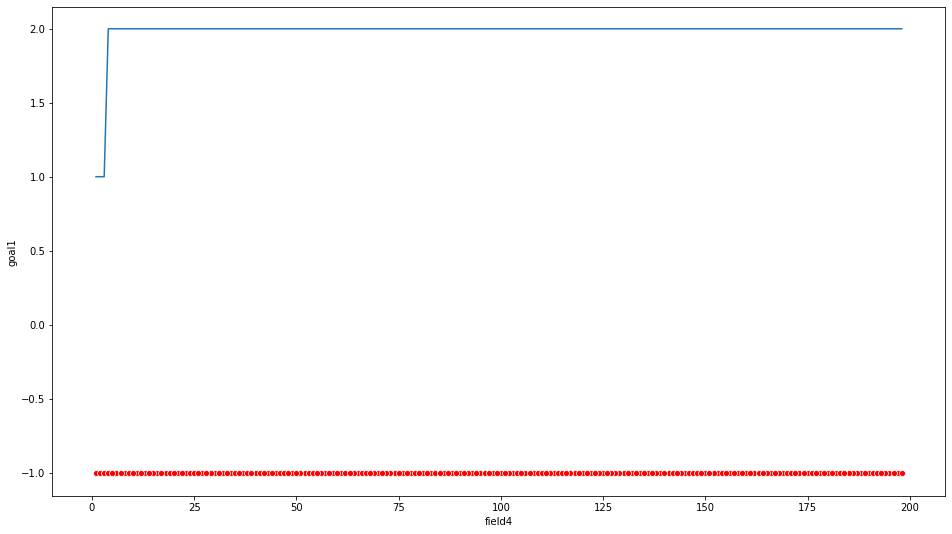

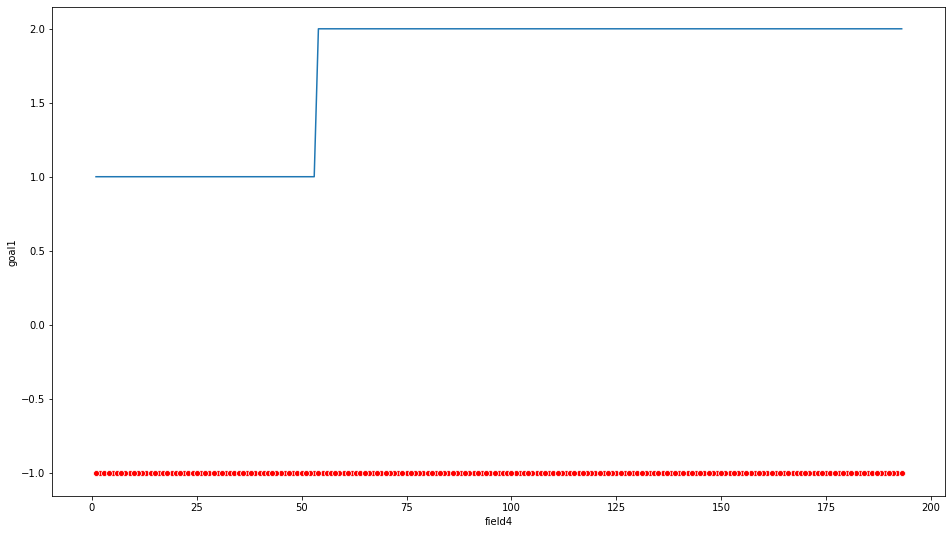

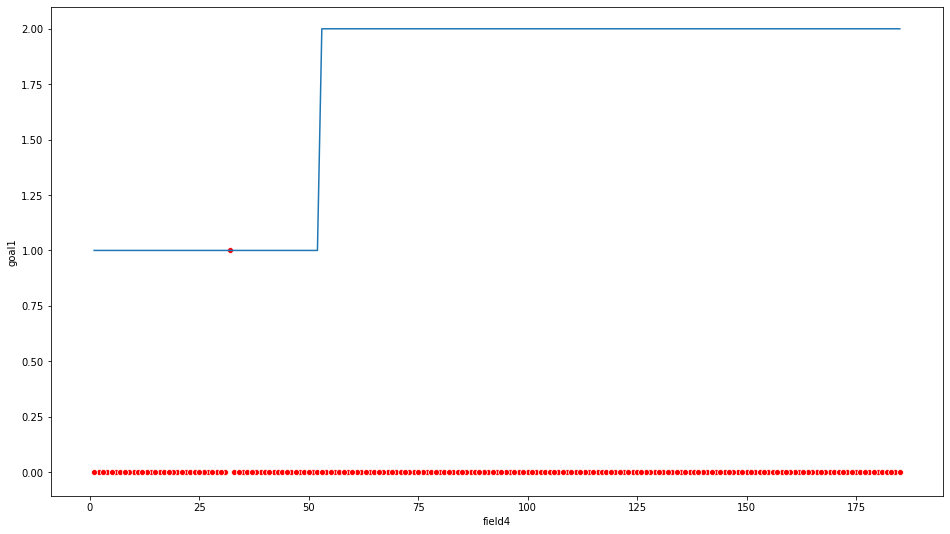

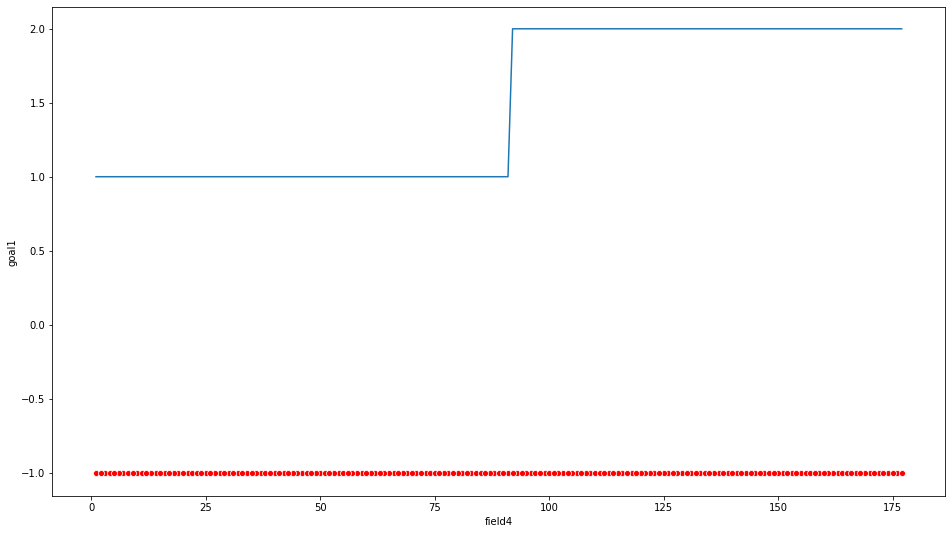

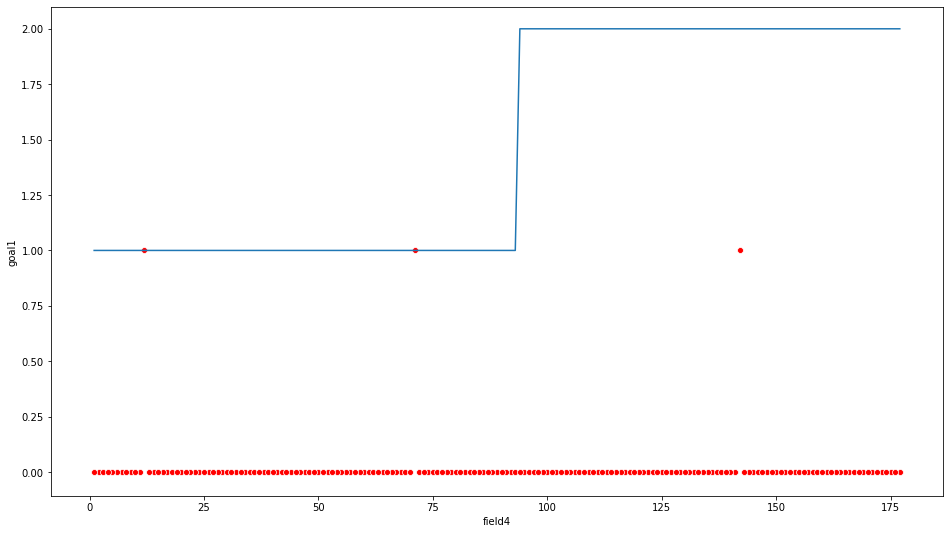

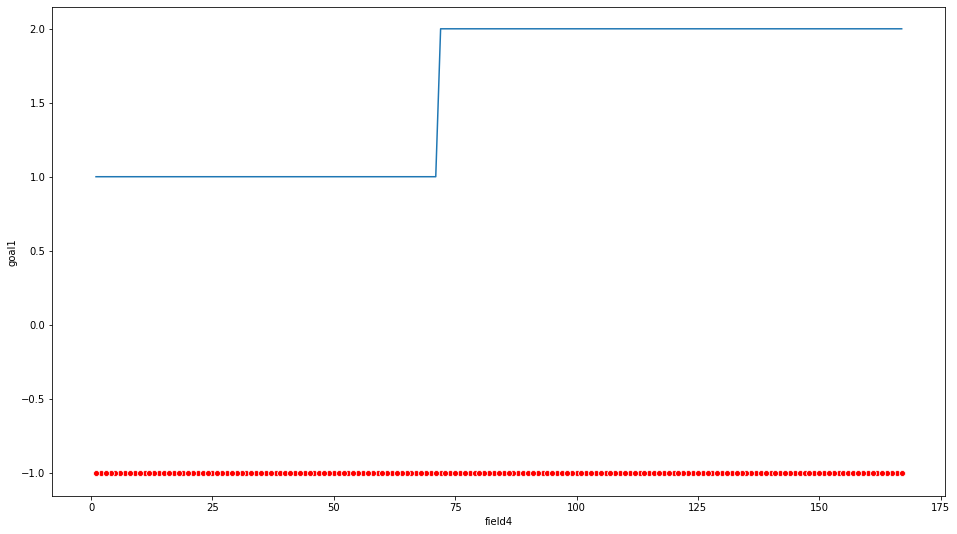

In [112]:
for i in range(10):
    user = top_users.index[i]
    plt.figure(figsize=(16,9))
    sns.lineplot(data = data[data.userid==user], x='field4', y='field21')
    sns.scatterplot(data = data[data.userid==user], x='field4', y='goal1',color='red')


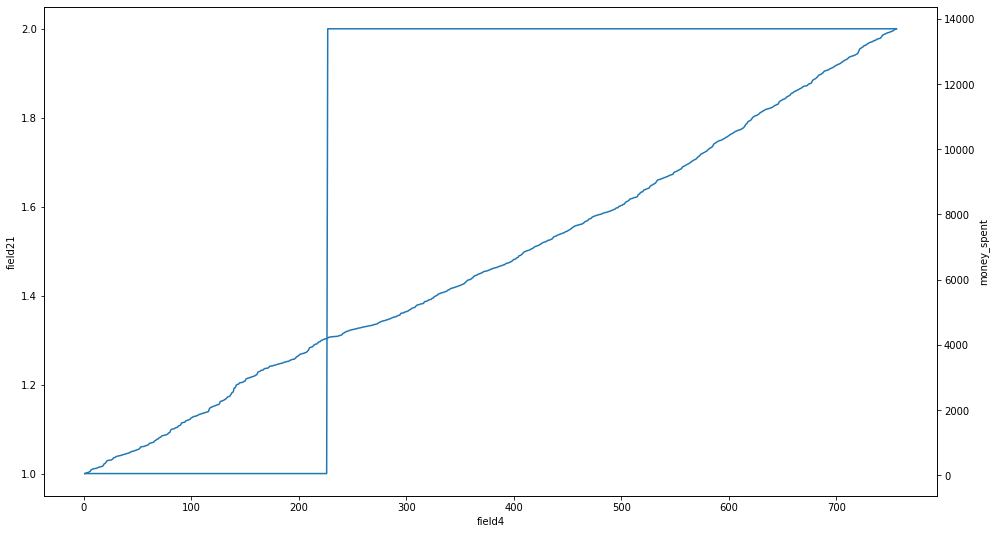

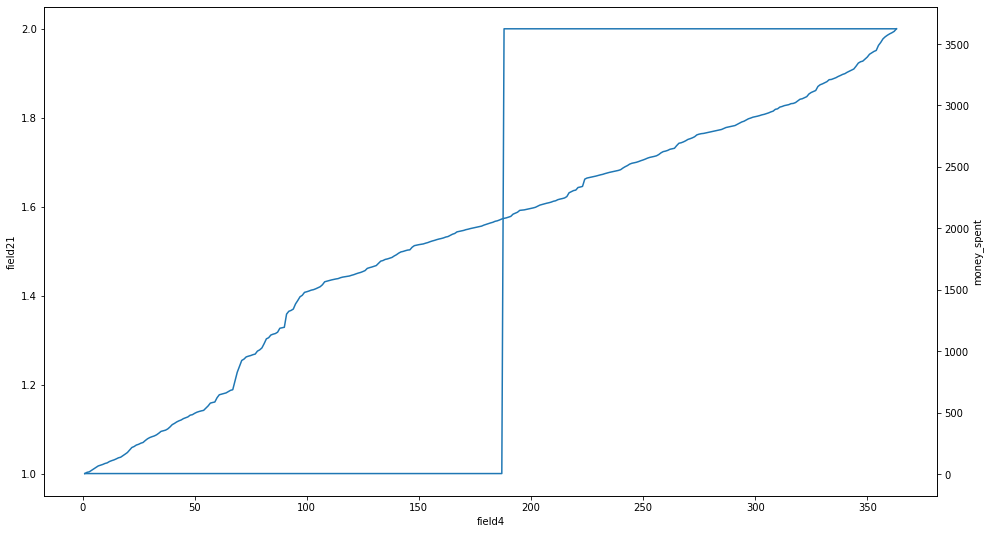

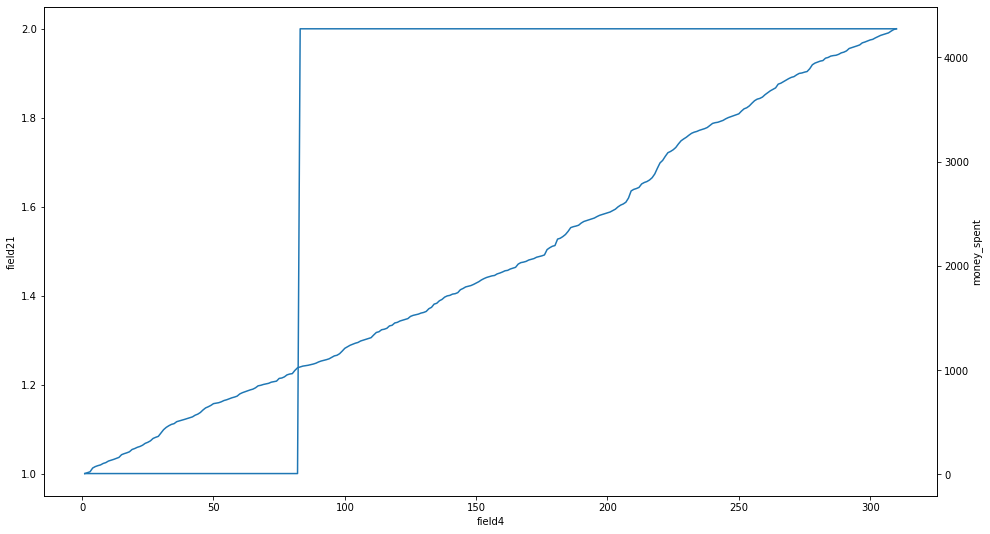

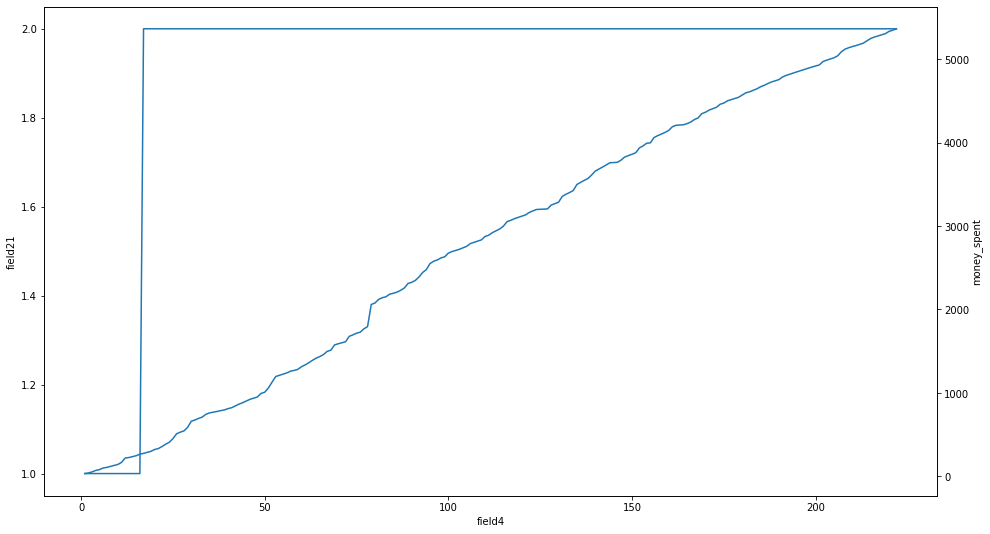

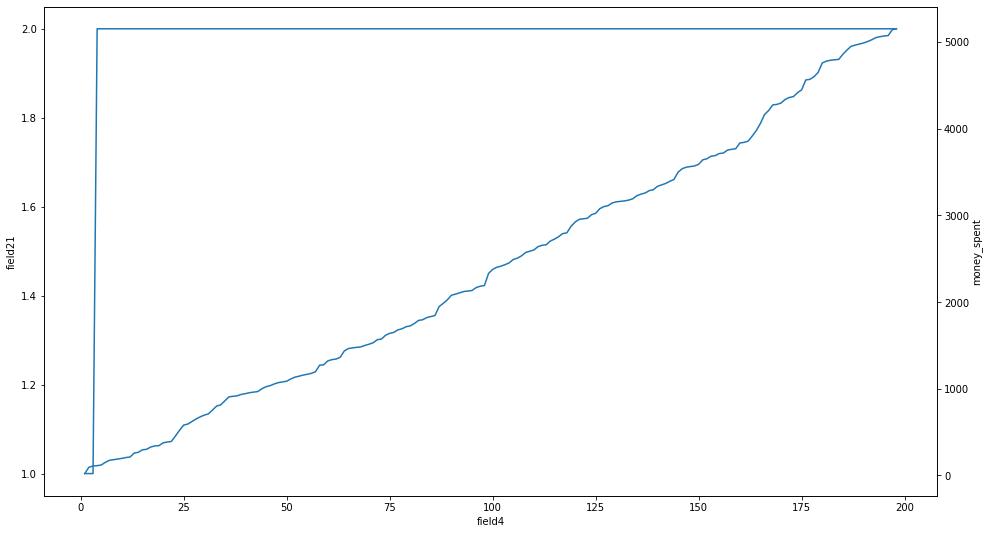

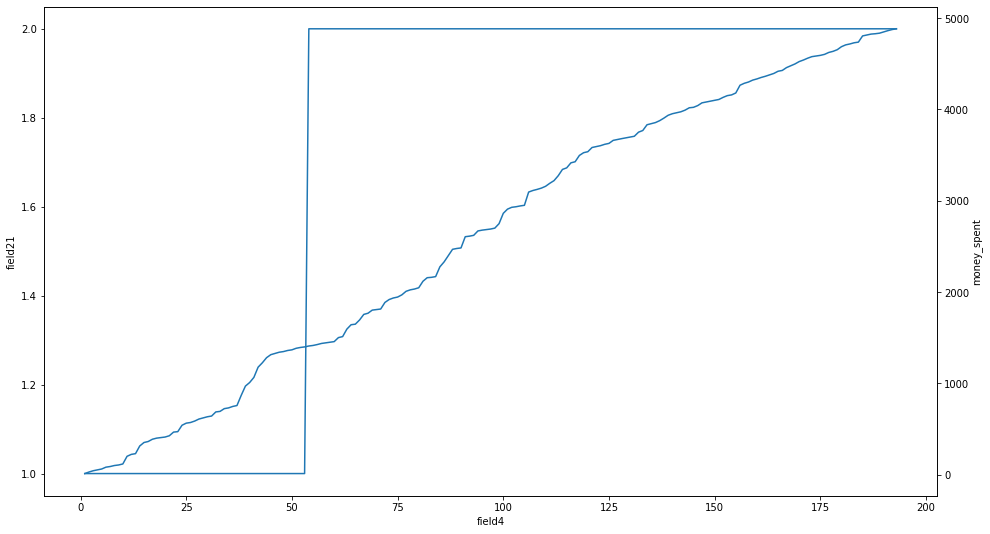

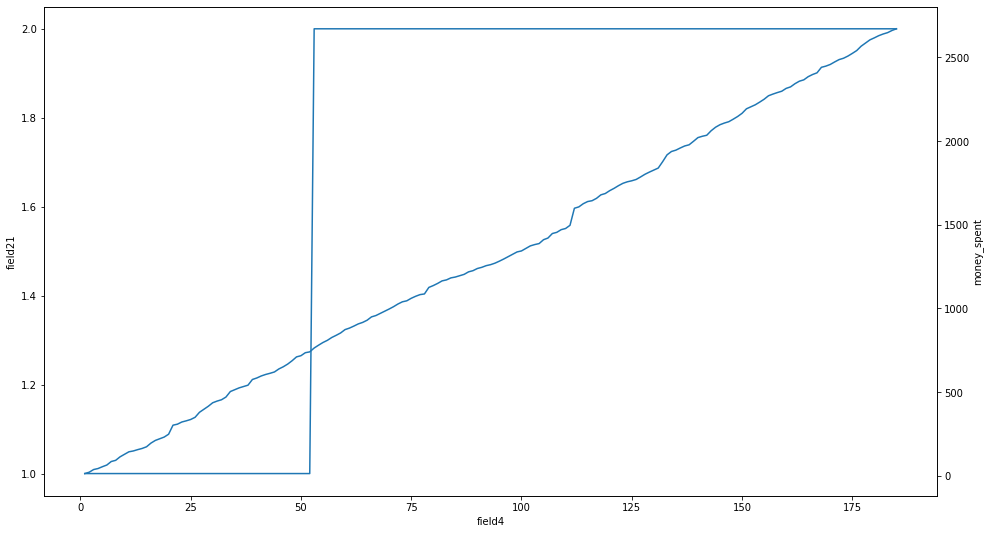

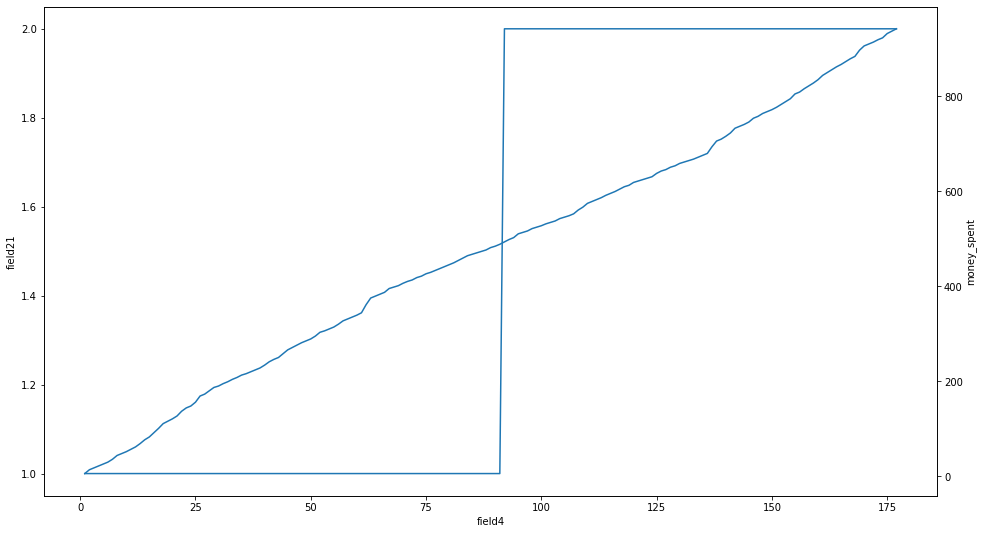

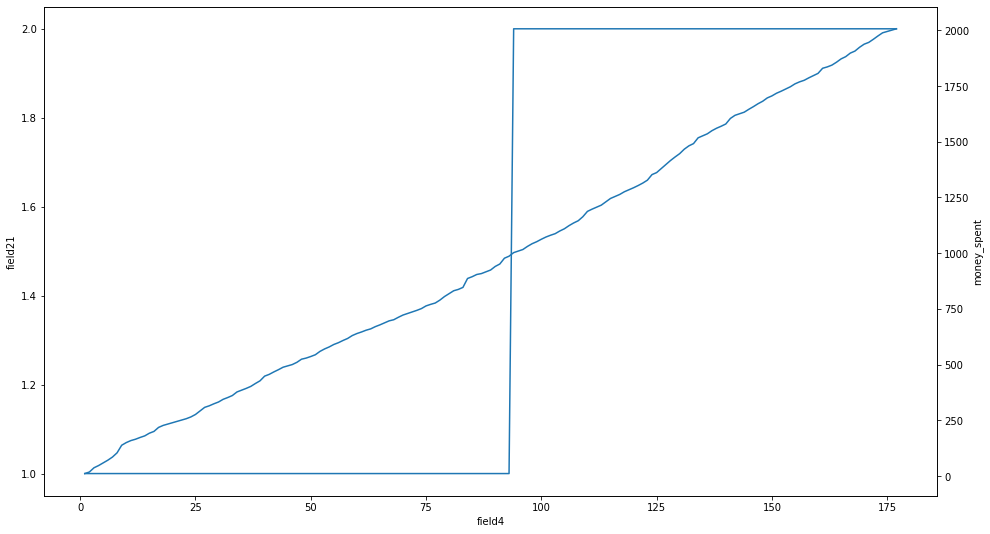

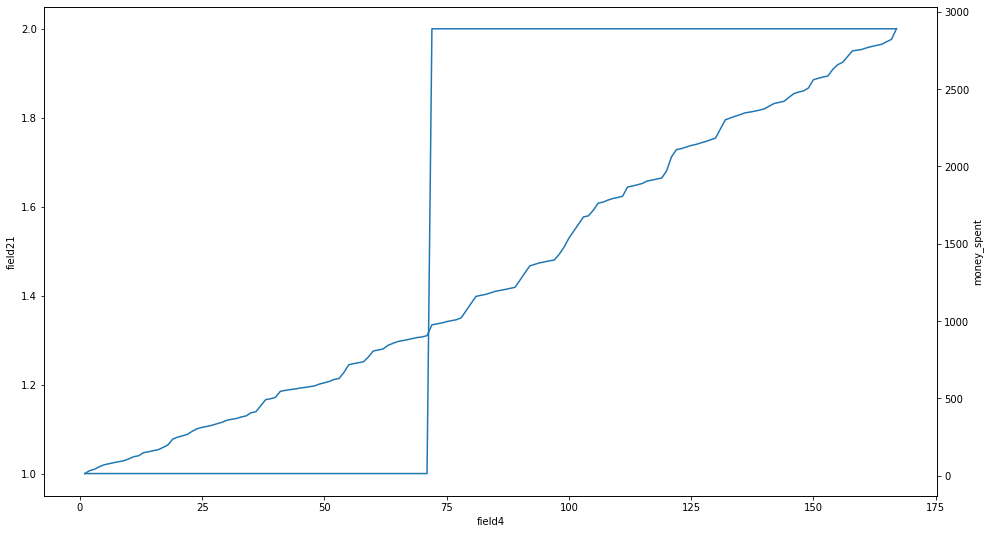

In [111]:
for i in range(10):
    user = top_users.index[i]
    udata = data[data.userid==user].set_index('field4').sort_index()
    udata['money_spent'] = udata['price'].cumsum()
    plt.figure(figsize=(16,9))
    ax = sns.lineplot(data = udata, x=udata.index, y='field21')
    ax.twinx()
    sns.lineplot(data = udata, x=udata.index, y='money_spent')
    # sns.scatterplot(data = udata, x='field4', y='field7',color='red')

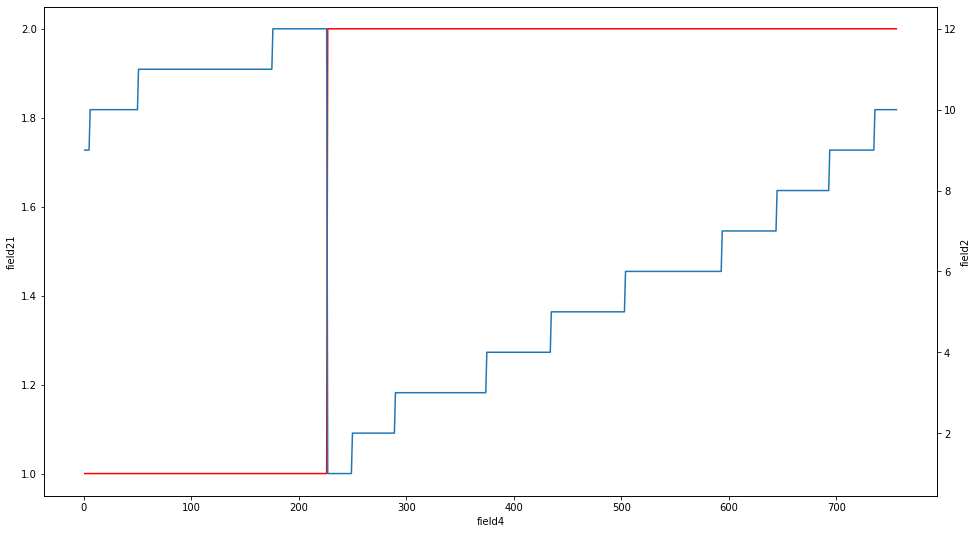

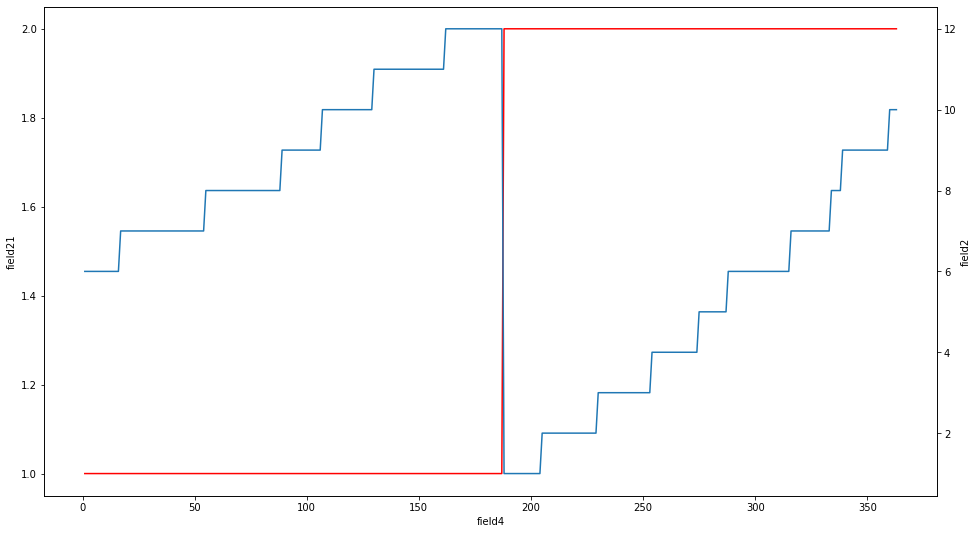

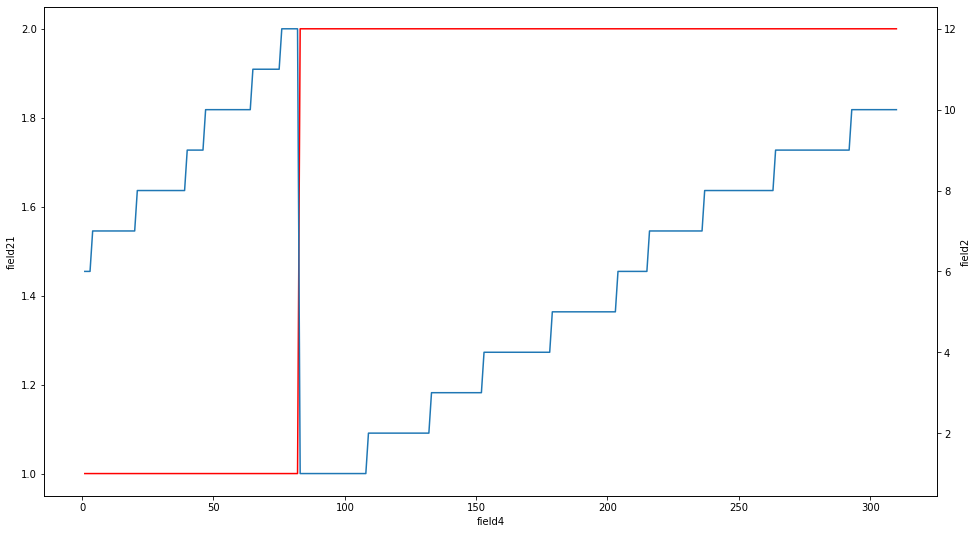

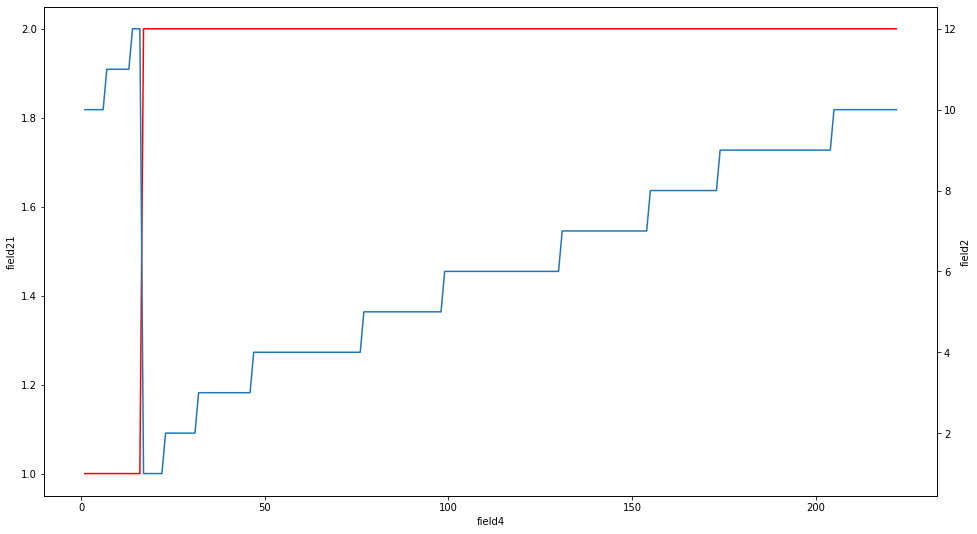

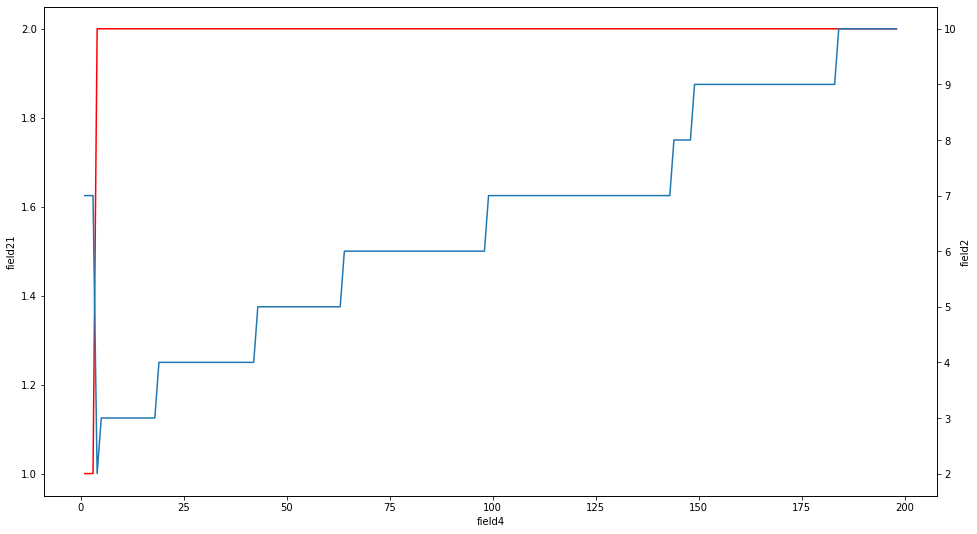

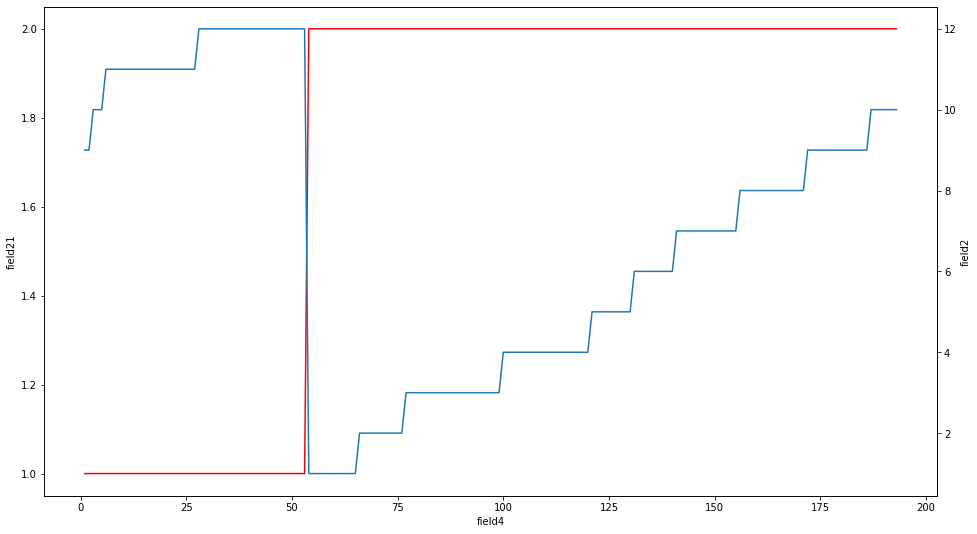

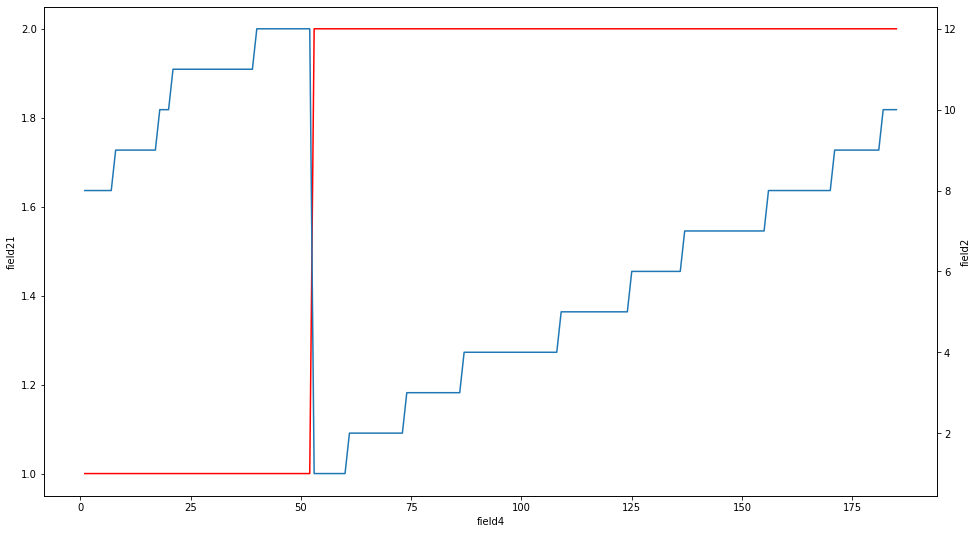

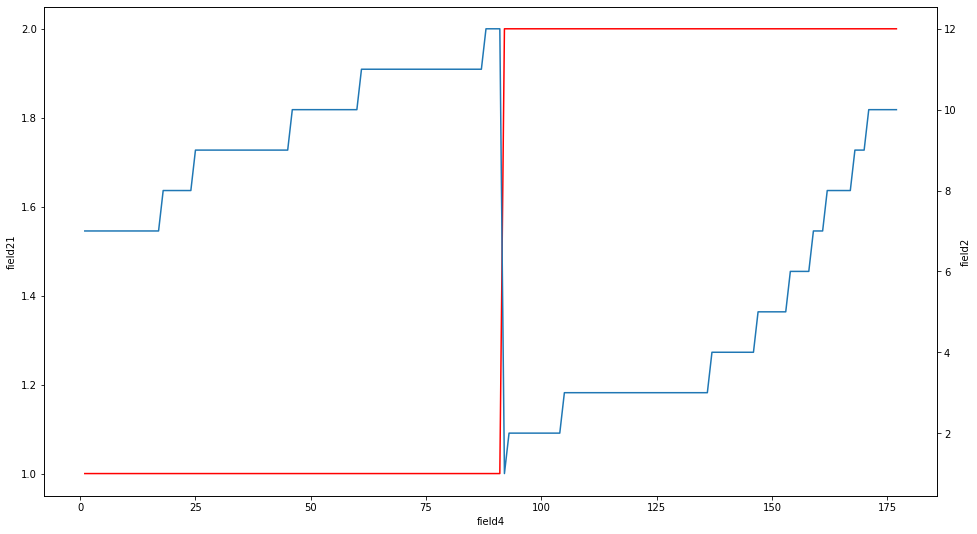

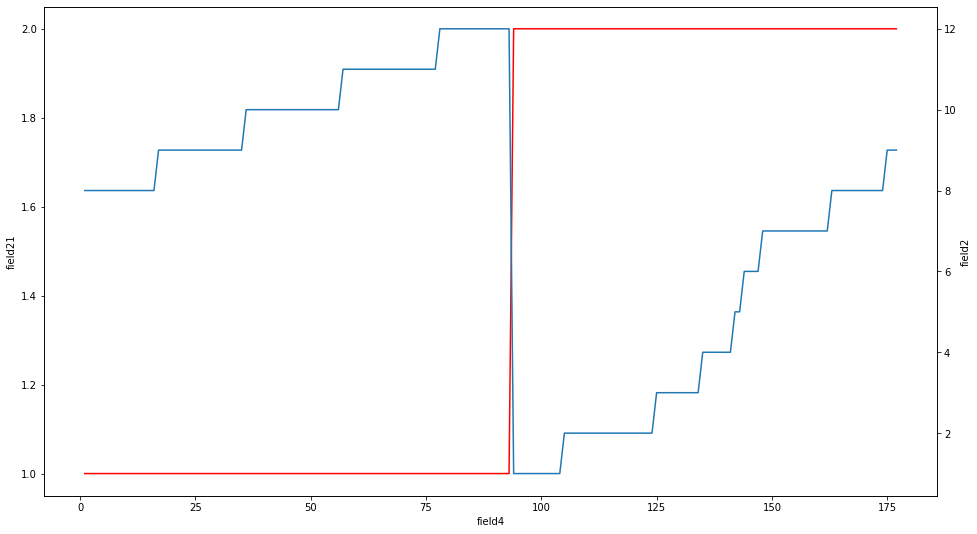

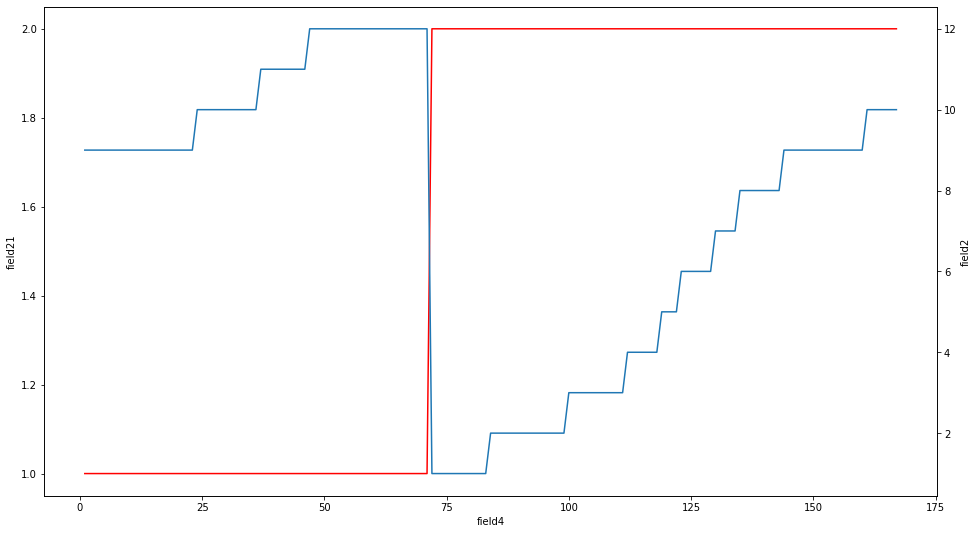

In [116]:
for i in range(10):
    user = top_users.index[i]
    udata = data[data.userid==user].set_index('field4').sort_index()
#     udata['money_spent'] = udata['price'].cumsum()
    plt.figure(figsize=(16,9))
    ax = sns.lineplot(data = udata, x=udata.index, y='field21',color='red')
    ax.twinx()
    sns.lineplot(data = udata, x=udata.index, y='field2')
    # sns.scatterplot(data = udata, x='field4', y='field7',color='red')

In [108]:
udata

,orderid,userid,field0,field1,field2,field3,field5,field6,field7,field8,...,goal22,goal23,goal24,goal25,goal1,paid_tickets,count,oneWay,price,money_spent
field4,,,,,,,,,,,,,,,,,,,,,
142,1219,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,0,0.381920,8,8,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,17,17
38,6264,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,0,2.088490,11,11,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,39,56
93,7312,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,1,-0.161080,2,2,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,2,167,1,10,66
96,9029,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,4,-0.393794,2,2,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,7,73
100,16465,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,1,3.639917,3,3,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,59,132
145,16524,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,1,1.002490,9,9,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,2,167,1,25,157
130,17523,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,4,-0.083509,7,7,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,11,168
76,19667,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,1,-0.471365,1,1,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,6,174
109,21192,350bc1455fa1adeef3346b956f87e23252b751efdbdec5...,2,-0.161080,3,3,0,0,2,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,1,167,1,10,184


In [27]:
for month in range(1,13):
    print('----------   ',month)
    print(data[data['field3']==month]['field16'].value_counts().iloc[:5])

----------    1
1    3155
2    2211
3    1678
4    1533
0    1344
Name: field16, dtype: int64
----------    2
1    2979
2    1814
3    1201
0    1170
4    1009
Name: field16, dtype: int64
----------    3
1    3237
2    2037
3    1427
0    1314
4    1108
Name: field16, dtype: int64
----------    4
1    3115
2    1878
3    1361
0    1244
4    1096
Name: field16, dtype: int64
----------    5
1    2718
2    1598
3    1191
0    1031
4     901
Name: field16, dtype: int64
----------    6
1    10404
2     7317
3     5472
4     4099
0     3895
Name: field16, dtype: int64
----------    7
1    12922
2     9164
3     7476
4     6297
5     5193
Name: field16, dtype: int64
----------    8
1    12238
2     8375
3     6279
4     5087
5     4189
Name: field16, dtype: int64
----------    9
1    11429
2     7668
3     5715
4     4607
0     4358
Name: field16, dtype: int64
----------    10
1    12295
2     7946
3     6092
4     4946
0     4935
Name: field16, dtype: int64
----------    11
1    11673
2     

In [14]:
top_places = [4,5,8,9,3,2]

No handles with labels found to put in legend.


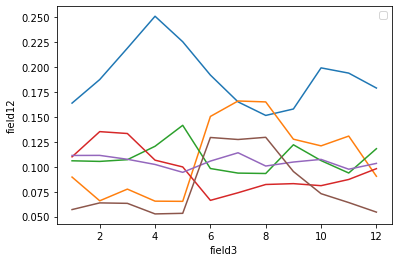

In [21]:
flights_by_month = data.groupby('field3')['field12'].agg('count')
for place in top_places:
#     place=4
    place_stat=     data[data['field12']==place].groupby('field3')['field12'].agg('count') / flights_by_month
    sns.lineplot(y=place_stat,x=place_stat.index)
plt.legend()

In [19]:
place_stat

field3
1     0.163793
2     0.187408
3     0.218876
4     0.250898
5     0.225334
6     0.191924
7     0.165025
8     0.151443
9     0.157896
10    0.199139
11    0.193869
12    0.178917
Name: field12, dtype: float64

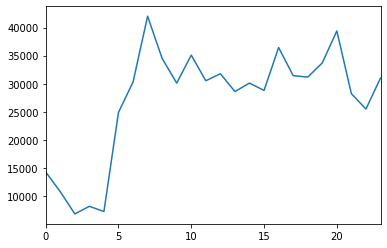

In [24]:
data['field23'].value_counts().sort_index().plot()

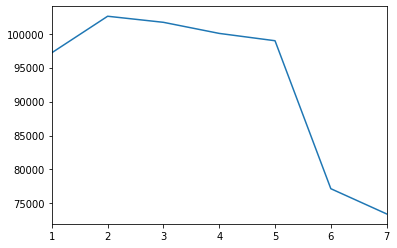

In [26]:
data['field18'].value_counts().sort_index().plot()

In [63]:
data[data['field12']==place].groupby('field3')['field12'].agg('count')#.plot()

field3
1      2174
2      1215
3      1242
4       968
5       936
6      7069
7     11581
8     11988
9      8112
10     5761
11     4325
12     3736
Name: field12, dtype: int64

field3
1     38109
2     19060
3     19623
4     18370
5     17565
6     54657
7     90962
8     92563
9     85189
10    78935
11    67494
12    68540
Name: field12, dtype: int64